# Machine Learning Master Notes 16 - Logistics Regression

### Prepare Environment

In [1]:
%matplotlib inline

# Essential libraries
import numpy as np
import pandas as pd
import math
import scipy
import random
import datetime
from datetime import datetime

# Graphical Component
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm

## SciKit Learning Preprocessing 
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## SciKit Learn Pipeline and Train Test Split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## SciKit Learn ML Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

## SciKit Learn Dataset
import sklearn.datasets as skdata
from sklearn.datasets import make_blobs, make_classification, make_circles, make_gaussian_quantiles

# The following file contain the finalized gradient descent, cost function program 
import MyRegressionProgramV1 as my
import testFile as test


## What is Logistics Regression

In machine learning, we use Linear Regression to predict housing prices and many other types of prices. We can also use Linear Regression to predict temperature, production volume, water level etc. We consider these types of problems as linear problems since there are many possible prices during the prediction.

For classification problems such as classifying a prediction as yes or no, true or false or 0 and 1, we use Logistic Regression. We use logistic regression to predict the probability of an outcome that is nearer to the true or closer to false. Please note that Logistic Regression is not similar to linear regression. It was named Logistic Regression in the past.

Examples of Logistic Regression are, classifying tumors as benign or malignant, deciding if an email is spam, deciding if a financial transaction is fraudulent. The above examples are also known as binary classification since we are classifying a prediction to yes or no. 

**Please be careful and take note how the hypothesis and its prediction are formed. A prediction of a presence of a malignant tumor is OPPOSITE to the prediction of a benign tumor. The prediction of a patient that has cancer is also OPPOSITE to the prediction of a patient that has NO cancer.** 

**The label of the expected outcome is very important to your hypothesis.** If your hypothesis is to determine email that are spam, then make sure the label of your expected outcome(y_train) is set to 1 for spam, good email should be set to 0. If your expected  label is opposite to your hypothesis, then you might want to change your hypothesis or reverse your expected label. **Beware of how the outcome is labeled and always double check against the hypothesis.**

Please note that there are 3 types of classification problem as shown below:

- Binary Classification: This is the standard classification where we have only a **true or false prediction.**
- Multi-Class Classification:  In multi-class classification system, we classify the prediction into multiple classes such as the subject of a book, classify a movie to different genres or classify a news article into different topics. **We can have many classes but one record can only belongs to one class.**
- Multi-Label Classification: In multi-label classification system, **a record can have more than one classification label.**
  

We will be looking at binary classification first and then multi-class classification. Multi-label classification is more involved in text processing and thus is beyond the scope of this introduction.

## Examples of Simple Binary Classification Data

### One Feature Simple Classification Data

In [2]:
x_train = np.array([1, 2.1, 11, 3.9, 8, 3, 9.6, 6.5, 7.2, 4.5, 5, 10]).reshape(-1,1)
y_train = np.array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [3]:
x_train_positive = x_train[y_train == 1]
x_train_positive

array([[11. ],
       [ 8. ],
       [ 9.6],
       [ 6.5],
       [ 7.2],
       [10. ]])

In [4]:
y_train_positive = y_train[y_train == 1]
y_train_positive

array([1, 1, 1, 1, 1, 1])

In [5]:
x_train_negative = x_train[y_train == 0]
x_train_negative 

array([[1. ],
       [2.1],
       [3.9],
       [3. ],
       [4.5],
       [5. ]])

In [6]:
y_train_negative = y_train[y_train == 0]
y_train_negative

array([0, 0, 0, 0, 0, 0])

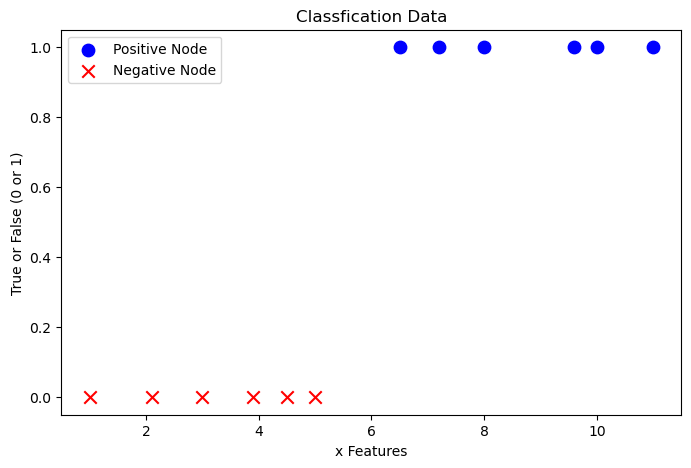

In [7]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x_train_positive, y_train_positive, marker='o', s = 80, c='b', label="Positive Node")
ax1.scatter(x_train_negative, y_train_negative, marker='x', s = 80, c='r', label="Negative Node")
ax1.set_title('Classfication Data')
ax1.set_xlabel('x Features')
ax1.set_ylabel('True or False (0 or 1)')
ax1.legend(loc="upper left")
plt.show()

### Two Features Classification Example

In [8]:
X2_train = np.array([[1, 3], [2,4], [8, 9], [3,4],[7, 8.5], [6.8, 7.5], [2,5],[1.5, 2.5]])
y2_train = np.array([0, 0, 1, 0, 1, 1, 0, 0])

In [9]:
X2_train

array([[1. , 3. ],
       [2. , 4. ],
       [8. , 9. ],
       [3. , 4. ],
       [7. , 8.5],
       [6.8, 7.5],
       [2. , 5. ],
       [1.5, 2.5]])

In [10]:
X2_train_pos = X2_train[y2_train == 1]
X2_train_pos

array([[8. , 9. ],
       [7. , 8.5],
       [6.8, 7.5]])

In [11]:
X2_train_neg = X2_train[y2_train == 0]
X2_train_neg

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 4. ],
       [2. , 5. ],
       [1.5, 2.5]])

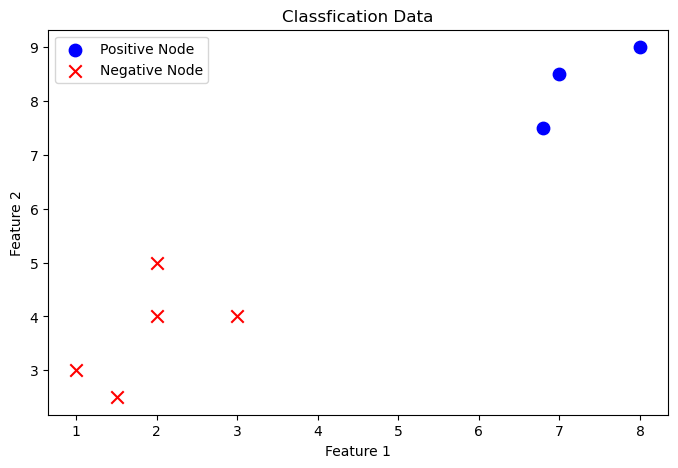

In [12]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2_train_pos[:,0], X2_train_pos[:,1], marker='o', s = 80, c='b', label="Positive Node")
ax1.scatter(X2_train_neg[:,0], X2_train_neg[:,1], marker='x', s = 80, c='r', label="Negative Node")
ax1.set_title('Classfication Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend(loc="upper left")
plt.show()

### School Exam and Admission Dataset Example

**Example Dataset**

The following dataset contains 2 exam score from student and the result of admission to the school. We can use the dataset to build a Logistics Regression model to predict students admission to the school based on their exam score.

In [13]:
df3 = pd.read_csv('./data/exam_score_data1.txt')
df3.head()

,Exam1,Exam2,schoolAdmission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [14]:
X3_train = df3[['Exam1','Exam2']]
X3_train.head()

,Exam1,Exam2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [15]:
X3_train.shape

(100, 2)

In [16]:
y3_train = df3[['schoolAdmission']]
y3_train.head()

,schoolAdmission
0,0
1,0
2,0
3,1
4,1


In [17]:
y3_train.shape

(100, 1)

In [18]:
X3_train = X3_train.to_numpy()
y3_train = y3_train.to_numpy()

In [19]:
X3_train_admitted = X3_train[y3_train.flatten() == 1]
X3_train_admitted.shape

(60, 2)

In [20]:
X3_train_NotAdmitted = X3_train[y3_train.flatten() == 0]
X3_train_NotAdmitted.shape

(40, 2)

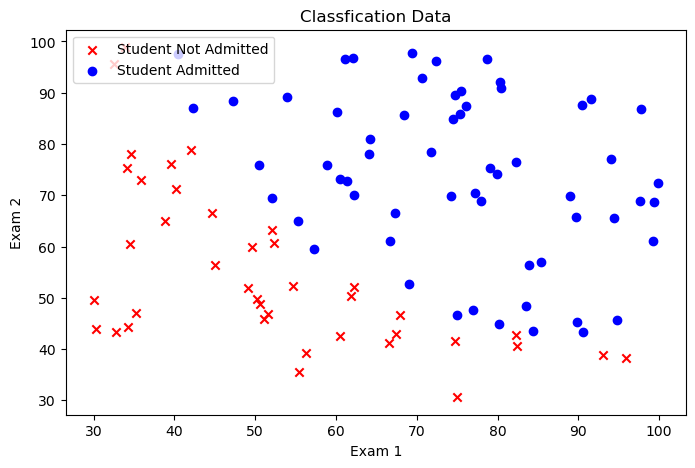

In [21]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3_train_NotAdmitted[:,0], X3_train_NotAdmitted[:,1], marker='x', c='r', label="Student Not Admitted")
ax1.scatter(X3_train_admitted[:,0], X3_train_admitted[:,1], marker='o', c='b', label="Student Admitted")
ax1.set_title('Classfication Data')
ax1.set_xlabel('Exam 1')
ax1.set_ylabel('Exam 2')
ax1.legend(loc="upper left")
plt.show()

## Sigmoid Function

In Linear Regression, we have the formula

$$f(x) = b + wx$$


In Logistics Regression, $f(x)$ is also $z$. Therefore:

<font color='blue'>
    
$$z = f(x)$$

</font>

We use the formula $z=f(x)$ above in Logistics Regression, and apply a **Sigmoid Function (a.k.a Logistic Function)** to the formula. This **Sigmoid function** converts $f(x)$ to a number that falls between 0 and 1.

**Sigmoid Function** is also known as **Logistics Function**:

<font color='blue'>
    
$$g(z) = \frac{1}{1+e^{-z}}$$

</font>

The result of $g(z)$ will be:
$$0 < g(z) < 1$$

We need to apply $f(x) = b + wx$ into the Sigmoid function $g(z) = \frac{1}{1+e^{-z}}$

$$$$
$$f(x) = b + wx$$
$$z = f(x)$$
$$z = b + wx$$
$$$$
$$g(z) = \frac{1}{1+e^{-z}}$$
$$g(z) = g(f(x))$$
$$$$

$$g(z) = g(f(x)) = \frac{1}{1+e^{-z}}$$
$$g(f(x)) = \frac{1}{1+e^{-(f(x))}}$$
$$g(f(x)) = \frac{1}{1+e^{-(b + wx)}}$$
$$$$


In general, we use the following for logistics regression:
<font color='blue'>    
$$g(z) = g(f(x)) = \frac{1}{1+e^{-(z)}} = \frac{1}{1+e^{-(f(x))}}$$
</font>
We can substitute any $f(x)$ we have into the Sigmoid Function


Please note that Sigmoid function returns a number between 0 and 1. Usually we set the **threshold as 0.5**, if it is more than 0.5 then it will be True or 1; and less than 0.5 will be False or 0. We interpret the Sigmoid function as the probability of the label is True. If the Sigmoid function return 0.6, then we can say that there is 60% chances to predict the data as True.

Please note that **threshold can be adjusted** according to the requirement. The usual practice is 0.5.

Therefore, we can also formulate the formula:

$$f(x) = P(y = 1| \vec{X}, \vec{w}, b)$$
$$$$
The formula above can be interpreted as the probability of $y = 1$ given the variable $\vec{X}$, $\vec{w}$ and the intercept. Please also note that:
$$$$
$$P(y = 1) + P(y = 0) = 1$$



**Referecne**

- https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9

In [22]:
def sigmoid_beta(z):
    '''
    Sigmoid Function
    z = f(x) a matrix of m by 1, each training examples in rows (m) and fx in 1 column, 

    Return:
    Sigmoid (scalar)
    '''

    # there will be overflow error if we have data that is less than -709
    # to overcome this error we use np.clip to limit the data range from -700 to 700
    # The result will still be between 0 to 1
    z = np.clip(z, -700, 700)
    #print(z)
    sigmoid = 1 / (1 + np.exp(-z))
    
    return sigmoid

In [23]:
X4_train = np.arange(-10, 10, 1)
X4_train

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [24]:
ypred = np.round(sigmoid_beta(X4_train), 3)
ypred

array([0.   , 0.   , 0.   , 0.001, 0.002, 0.007, 0.018, 0.047, 0.119,
       0.269, 0.5  , 0.731, 0.881, 0.953, 0.982, 0.993, 0.998, 0.999,
       1.   , 1.   ])

- All number fall between 0 and 1.
- The larger original data (z) then the result is is closer to 1
- The smaller the input data (z), then close the result is to 0.
- If the input is 0 then the sigmoid is exactly at 0.5 threshold.

In [25]:
sigmoid_beta([-700, -12, -1, 0, 1, 10, 700, 900])

array([9.85967654e-305, 6.14417460e-006, 2.68941421e-001, 5.00000000e-001,
       7.31058579e-001, 9.99954602e-001, 1.00000000e+000, 1.00000000e+000])

So we can safely say that when $f(x) = z$ is greater than 0, then the Sigmoid function will return more than 0.5 to 1. 

If $f(x)=z$ is less than 0, then Sigmoid will return a False as the return will fall between 0 to 0.49.

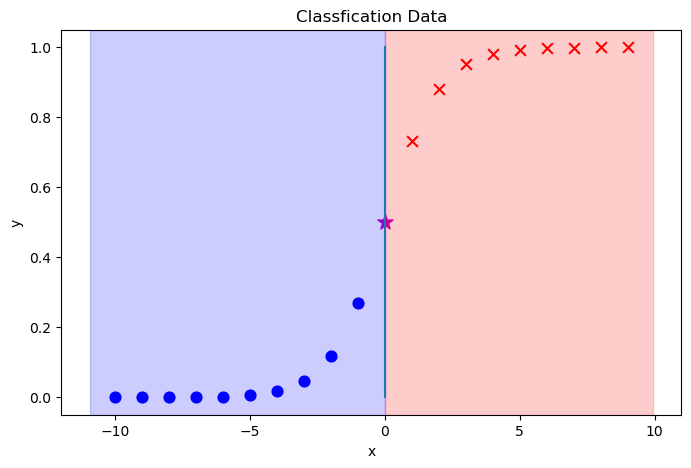

In [26]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X4_train[ypred>0.5], ypred[ypred>0.5], marker='x', s = 60, c='r')
ax1.scatter(X4_train[ypred<0.5], ypred[ypred<0.5], marker='o', s = 60, c='b')
ax1.scatter(X4_train[ypred==0.5], ypred[ypred==0.5], marker='*', s = 130, c='m')
ax1.plot(np.zeros(10), np.linspace(0,1,10))
xlim = ax1.get_xlim()
#print(xlim)
ax1.axvspan(xlim[0], 0, alpha=0.2, color='blue')
ax1.axvspan(0, xlim[1], alpha=0.2, color='red')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

### Summary of Sigmoid Function

$$g(z) = g(f(x)) = \frac{1}{1+e^{-(f(x))}}$$

$$0 < g(z) < 1$$

If $g(z) > 0$ then $0.5 < y < 1$
$$$$
If $g(z) < 0$ then $0 < y < 0.5$
$$$$
If $g(z) = 0$ then $y = 0.5$

<div class="alert alert-block alert-info">

**Please also note that Sigmoid Function is only ONE of the functions use in machine learning. There are many ways to construct $g(z)$. We can apply different type of function besides the Sigmoid Function.**

</div>

In [27]:
X5_train = np.linspace(-10, 10, 50)
ypred = sigmoid_beta(X5_train)

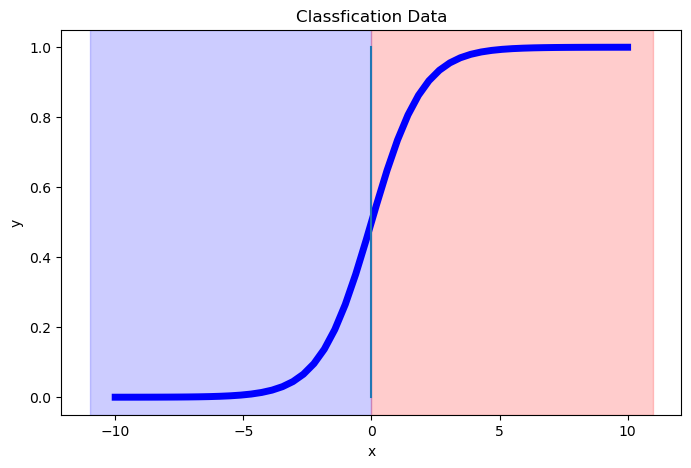

In [28]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(X5_train, ypred, c='b', linewidth = 5)
ax1.plot(np.zeros(10), np.linspace(0,1,10))
xlim = ax1.get_xlim()
#print(xlim)
ax1.axvspan(xlim[0], 0, alpha=0.2, color='blue')
ax1.axvspan(0, xlim[1], alpha=0.2, color='red')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

#### Testing Sigmoid

In [29]:
sigmoid_beta(np.array([-1, 0, 1, 2]))

array([0.26894142, 0.5       , 0.73105858, 0.88079708])

<details>
<summary>
    <b>Expected Output<b>
</summary>
<b>sigmoid([-1, 0, 1, 2])</b>
        
[0.26894142,        0.5,           0.73105858,        0.88079708]

### Sigmoid Numeric Issues

First let us try some numbers and its natural log.

In [30]:
z_temp1 = 9.99e+999
z_temp1

inf

In [31]:
sig1 = 1 / (1 + np.exp(-z_temp1))
sig1

1.0

z_temp1 is consider as inf but we can still compute the Sigmoid function to 1.

In [32]:
z_temp2 = 9.99e+99
z_temp2

9.99e+99

In [33]:
sig2 = 1 / (1 + np.exp(-z_temp2))
sig2

1.0

The largest number the system can accept is 9.99e+99. The Sigmoid is still 1

Let us try the negative number. Please note that we have a negative sign in the Sigmoid function, therefore, we will have a very large positive number to applied to the natural log.

In [34]:
z_temp3 = -9.99e+99
z_temp3

-9.99e+99

In [35]:
sig3 = 1 / (1 + np.exp(-z_temp3))
sig3

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3925/3017315470.py:1: RuntimeWarning: overflow encountered in exp
  sig3 = 1 / (1 + np.exp(-z_temp3))


0.0

We have overflow error, this is because in floating point operation, there is a limit on how large the number we are able to process.

In [36]:
z_temp4 = np.array([-799.])
z_temp4

array([-799.])

In [37]:
sig4 = 1 / (1 + np.exp(-z_temp4))
sig4

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3925/1031226181.py:1: RuntimeWarning: overflow encountered in exp
  sig4 = 1 / (1 + np.exp(-z_temp4))


array([0.])

In [38]:
z_temp5 = -710.
z_temp5

-710.0

In [39]:
sig5 = 1 / (1 + np.exp(-z_temp5))
sig5

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3925/3194799085.py:1: RuntimeWarning: overflow encountered in exp
  sig5 = 1 / (1 + np.exp(-z_temp5))


0.0

In [40]:
z_temp6 = -709.
z_temp6

-709.0

In [41]:
sig6 = 1 / (1 + np.exp(-z_temp6))
sig6

1.216780750623423e-308

The result 1.216780750623423e-308 is effectively a zero.

**Therefore, we can conclude that the Sigmoid function can only accept -709 and higher. It will throw overflow error when we supply -710. However, the function accepts any large number and even infinity number.**

The following shows that the problem lies in the natural log for positive number, the natural log cannot accept any number larger than 709. (Please note that we have a negative sign in front of z in the Sigmoid function). 

In [42]:
np.exp(710)

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3925/574927170.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(710)


inf

In [43]:
np.exp(709)

8.218407461554972e+307

In [44]:
np.exp(-1)

0.36787944117144233

In [45]:
np.exp(-999)

0.0

In [46]:
np.exp(-9.9e+99)

0.0

In [47]:
np.exp(-9.9e+9999)

0.0

The above examples shows that the Sigmoid function will throw overflow error as long as the number is larger than 709. 

Back to the Sigmoid function, as we know that any number larger than 0 will return a Sigmoid of 0.5 to 1. There is no point in allowing very large number since it will always return a 1. Similarly a negative number of -709 is basically a zero. Since the system, will encounter overflow when we input -710. We can limit the positive end and negative end between 700 and -700. 

In [48]:
z_temp7 = -700.

In [49]:
sig7 = 1 / (1 + np.exp(-z_temp7))
sig7

9.85967654375977e-305

In [50]:
z_temp8 = 700.

In [51]:
sig8 = 1 / (1 + np.exp(-z_temp8))
sig8

1.0

Therefore we can limit our values between 700 and -700 in order to avoid the overflow error.  Thus we use the `np.clip` function.

In [52]:
z_temp9 = -9.99e+99
z = np.clip(z_temp9, -700, 700)
z

-700.0

In [53]:
sig9 = 1 / (1 + np.exp(-z))
sig9

9.85967654375977e-305

In [54]:
z_temp10 = np.array([-999, -799, -709, -200, -50, -10, 0, 10, 50, 200, 709, 799, 999, 9.99e+999], dtype=float)
z_temp10

array([-999., -799., -709., -200.,  -50.,  -10.,    0.,   10.,   50.,
        200.,  709.,  799.,  999.,   inf])

In [55]:
z_temp11 = np.clip(z_temp10, -700, 700)
z_temp11

array([-700., -700., -700., -200.,  -50.,  -10.,    0.,   10.,   50.,
        200.,  700.,  700.,  700.,  700.])

In [56]:
sig11 = 1 / (1 + np.exp(-z_temp11))
sig11

array([9.85967654e-305, 9.85967654e-305, 9.85967654e-305, 1.38389653e-087,
       1.92874985e-022, 4.53978687e-005, 5.00000000e-001, 9.99954602e-001,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000])

#### Alternative Method

Instead of limiting the large positive and negative value. We can use an alternative Sigmoid equation to deal with the large negative number. The formula is as follows:
$$\frac{e^z}{1+e^z}$$
The above is good for dealing with negative number but not positive. So the best way is to use the normal Sigmoid equation for dealing with positive number and use the formula above to deal with positive number.

In [57]:
z_temp12 = np.array([-999, -799, -709, -200, -50, -10, 0, 10, 50, 200, 709, 799, 999, 9.99e+999], dtype=float)
z_temp12

array([-999., -799., -709., -200.,  -50.,  -10.,    0.,   10.,   50.,
        200.,  709.,  799.,  999.,   inf])

In [58]:
for each_z in z_temp12:
    sig = np.exp(each_z) / (1 + np.exp(each_z))
    print(f"For each z = {each_z}, the Sigmoid is: {sig}")

For each z = -999.0, the Sigmoid is: 0.0
For each z = -799.0, the Sigmoid is: 0.0
For each z = -709.0, the Sigmoid is: 1.216780750623423e-308
For each z = -200.0, the Sigmoid is: 1.3838965267367376e-87
For each z = -50.0, the Sigmoid is: 1.9287498479639178e-22
For each z = -10.0, the Sigmoid is: 4.5397868702434395e-05
For each z = 0.0, the Sigmoid is: 0.5
For each z = 10.0, the Sigmoid is: 0.9999546021312976
For each z = 50.0, the Sigmoid is: 1.0
For each z = 200.0, the Sigmoid is: 1.0
For each z = 709.0, the Sigmoid is: 1.0
For each z = 799.0, the Sigmoid is: nan
For each z = 999.0, the Sigmoid is: nan
For each z = inf, the Sigmoid is: nan


/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3925/1413296654.py:2: RuntimeWarning: overflow encountered in exp
  sig = np.exp(each_z) / (1 + np.exp(each_z))
/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3925/1413296654.py:2: RuntimeWarning: invalid value encountered in double_scalars
  sig = np.exp(each_z) / (1 + np.exp(each_z))


The alternative formula can deal with negative z but cannot handle large positive z. So the best way is to use the 2 formula, one formula to deal with the negative number and the standard formula deal with large positive number. This method is a little in efficient as we need a loop to examine each z value.

In [59]:
for each_z in z_temp12:
    if each_z < 0:
        sig = np.exp(each_z) / (1 + np.exp(each_z))
    else:
        sig = 1 / (1 + np.exp(-each_z))
    print(f"For each z = {each_z}, the Sigmoid is: {sig}")

For each z = -999.0, the Sigmoid is: 0.0
For each z = -799.0, the Sigmoid is: 0.0
For each z = -709.0, the Sigmoid is: 1.216780750623423e-308
For each z = -200.0, the Sigmoid is: 1.3838965267367376e-87
For each z = -50.0, the Sigmoid is: 1.9287498479639178e-22
For each z = -10.0, the Sigmoid is: 4.5397868702434395e-05
For each z = 0.0, the Sigmoid is: 0.5
For each z = 10.0, the Sigmoid is: 0.9999546021312976
For each z = 50.0, the Sigmoid is: 1.0
For each z = 200.0, the Sigmoid is: 1.0
For each z = 709.0, the Sigmoid is: 1.0
For each z = 799.0, the Sigmoid is: 1.0
For each z = 999.0, the Sigmoid is: 1.0
For each z = inf, the Sigmoid is: 1.0


Another way is to limit any negative number smaller than -709.

In [60]:
z_temp13 = np.where(z_temp12 < -709, -709, z_temp12)
z_temp13

array([-709., -709., -709., -200.,  -50.,  -10.,    0.,   10.,   50.,
        200.,  709.,  799.,  999.,   inf])

In [61]:
sig13 = 1 / (1 + np.exp(-z_temp13))
sig13

array([1.21678075e-308, 1.21678075e-308, 1.21678075e-308, 1.38389653e-087,
       1.92874985e-022, 4.53978687e-005, 5.00000000e-001, 9.99954602e-001,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000])

**Reference**

- https://blog.dailydoseofds.com/p/sigmoid-and-softmax-are-not-implemented
- https://stackoverflow.com/questions/37074566/logistic-sigmoid-function-implementation-numerical-precision
- https://shaktiwadekar.medium.com/how-to-avoid-numerical-overflow-in-sigmoid-function-numerically-stable-sigmoid-function-5298b14720f6

### Decision Boundary

A decision boundary is a line that separates the binary classification. Please note that besides the straight line, we can have different types of curvy decision boundary and we may have a circle type of decision boundary.

Below are some examples of decision boundaries.


Decision boundary is set when $g(z) = 0$. Let us take a formula for an example:

$b = -6$, $w=1$, $x = 1, 2.1, 11, 3.9, 8, 3, 9.6, 6.5, 7.2, 4.5, 5, 10]$
$$$$
$$f(x) = x \cdot w+b$$
$$f(x) = x \cdot 1 - 6$$
$$g(f(x)) = x - 6$$
If $g(z) = 0$, then
$$0 = x - 6$$
$$x - 6 = 0$$
$$x = 6$$

In [62]:
x_train = np.array([1, 2.1, 11, 3.9, 8, 3, 9.6, 6.5, 7.2, 4.5, 5, 10]).reshape(-1,1)
y_train = np.array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [63]:
x_train_pos = x_train[y_train == 1]
y_train_pos = y_train[y_train == 1]
x_train_neg = x_train[y_train == 0]
y_train_neg = y_train[y_train == 0]

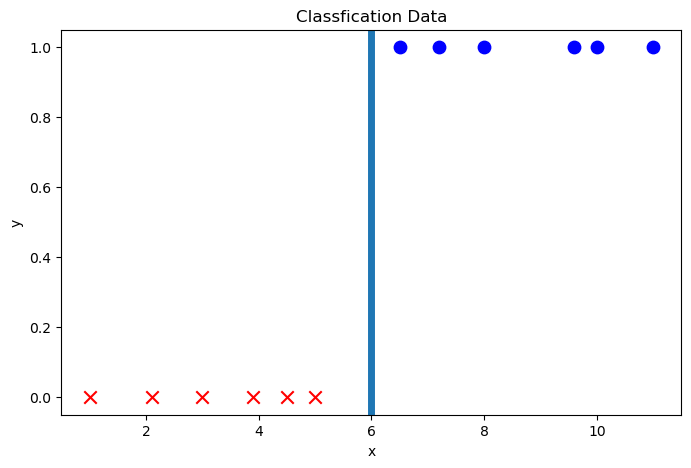

In [64]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x_train_pos, y_train_pos, marker='o', s = 80, c='b')
ax1.scatter(x_train_neg, y_train_neg, marker='x', s = 80, c='r')
# Below is the vertical line at x = 6
ax1.axvline(x=6, linewidth=5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

We can estimate the decision boundary by setting $g(z) = 0$

#### Another Example (Two Features)

$b = -10$, $w_1=1$, $w_2 = 1$, $x_1 = [1, 2, 8, 7, 6.8, 1.5]$ $x_2 = [3, 4, 9, 8.5, [7.5, 2.5]$
$$$$
$$f(x) = x_1w_1 + x_2w_2 + b$$
$$f(x) = x_1 + x_2 - 10$$
If $g(z) = 0$, then
$$0 = x_1 + x_2 - 10$$
$$x_1 + x_2 - 10 = 0$$
$$x_1 + x_2  = 10$$
$$x_1 = 10 - x_2$$
$$x_2 = 10 - x_1$$

In [65]:
X2_train = np.array([[1, 3], [2,4], [8, 9], [3,4],[7, 8.5], [6.8, 7.5], [2,5],[1.5, 2.5]])
y2_train = np.array([0, 0, 1, 0, 1, 1, 0, 0])

In [66]:
X2_train.shape

(8, 2)

In [67]:
X2_pos = X2_train[y2_train == 1]
y2_pos = y2_train[y2_train == 1]
X2_neg = X2_train[y2_train == 0]
y2_neg = y2_train[y2_train == 0]

In [68]:
x1 = np.arange(0,10)
x2 = 10 - x1

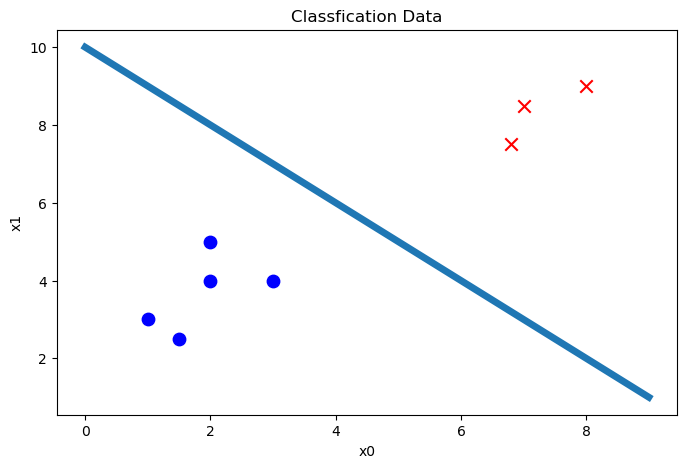

In [69]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2_pos[:,0], X2_pos[:,1], marker='x', s = 80, c='r')
ax1.scatter(X2_neg[:,0], X2_neg[:,1], marker='o', s = 80, c='b')
ax1.plot(x1, x2, linewidth=5)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

Besides straight lines, we may have other forms of decision boundaries such as a circle or an eclips. 

Examples of other form decision boundaries shown below:

In [70]:
from sklearn.datasets import make_blobs, make_circles, make_gaussian_quantiles

In [71]:
np.random.seed(10)
X, y = make_circles(n_samples=200, factor=0.1, noise=0.18)

In [72]:
X_pos = X[y == 1]
y_pos = y[y == 1]
X_neg = X[y == 0]
y_neg = y[y == 0]

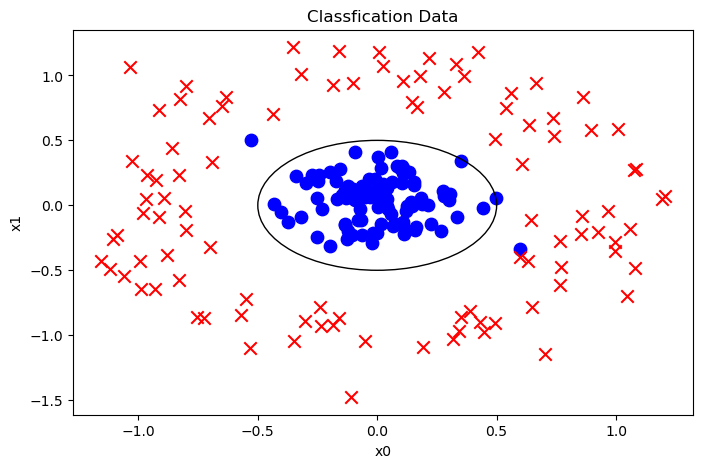

In [73]:
circle1 = plt.Circle((0, 0), 0.5, fill=False)
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X_pos[:,0], X_pos[:,1], marker='o', s = 80, c='b')
ax1.scatter(X_neg[:,0], X_neg[:,1], marker='x', s = 80, c='r')
ax1.add_patch(circle1)
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

**Please note that the plotted circle above was drawn manually as illustration. We will learn how to calculate decision boundaries later.**

A possible formula for circle is $w_1 = 1$, $w_2 = 1$, and $b = -1$
$$$$
$$f(x) = x_1^2 w_1 + x_2^2 w_2 + b$$
$$f(x) = x_1^2 + x_2^2 - 1$$
If $g(z) = 0$, then
$$0 = x_1^2 + x_2^2 - 1$$
$$x_1^2 + x_2^2 - 1 = 0$$
$$x_1^2 + x_2^2 = 1$$
$$x_1^2  = 1 - x_2^2$$
$$x_1  = \sqrt{1 - x_2^2}$$
$$x_2  = \sqrt{1 - x_1^2}$$
$$$$
We will show how to plot non-linear decision boundary using our prediction later in this tutorial.

Another example of decision boundaries:

In [74]:
np.random.seed(10)
X, Y = make_gaussian_quantiles(n_samples=100, n_features=2, n_classes=2)

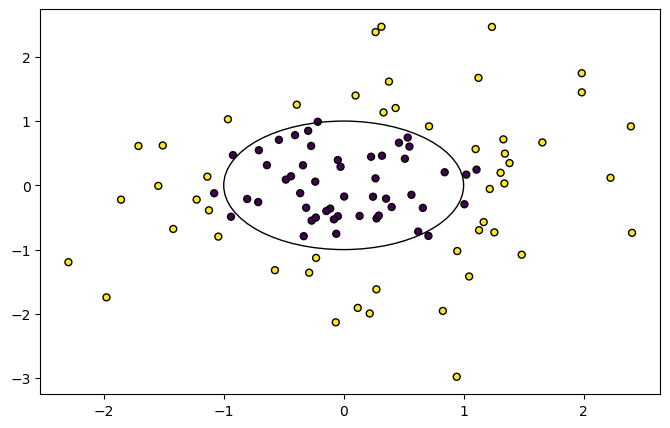

In [75]:
c1 = plt.Circle((0, 0), 1, fill=False)
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor='k')
ax1.add_patch(c1)
plt.show()

**The circle above is also manually drawn. The derivation of decision boundary could be a polynomial equation similar to the circle above. The boundary is derived using $g(z) = 0$.**

## Cost Function for Logistics Regression

Please note if we apply the same cost function for linear regression to logistics regression, we would not have a smooth convex cost function curve. Therefore it is not suitable to use it for logistics regression. We need to implement a new computation for Logistics Regression. 

### Lost Function

We are going to define the **Lost Function** as the differences between the prediction and actual data for each individual record before the summation and division by m.

Therefore the cost function is:
$$costFunction = J(w,b)$$
$$J(w,b) = \frac{1}{m} \sum_{m=1}^{m} {(LossFunction)}$$

The computation of **Loss Function** is as follows:

**Lost Function**
$$$$
<font color='blue'>
$$z = f(x)$$
$$Lost Function = L(f(x),\hat y)$$
When $y^{(i)} = 1$
$$L(f(x),\hat y) = -log(g(z))$$
$$L(f(x),\hat y) = -log(g(f(x)))$$
When $y^{(i)}=0$
$$L(f(x),\hat y) = -log(1-g(z))$$
$$L(f(x),\hat y) = -log(1-g(f(x)))$$

Let use explore the function $log(x)$ and $-log(x)$.

In [76]:
x = np.linspace(0.01,5,100)
y_log = np.log(x)
y_neg_log = -np.log(x)

The follow shows relationship between log(x) and -log(x)

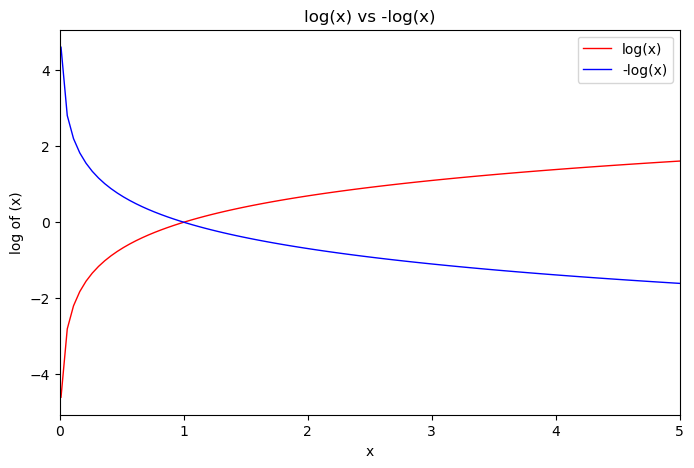

In [77]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(x, y_log, linewidth=1, c='r', label='log(x)')
ax1.plot(x, y_neg_log, linewidth=1, c='b', label='-log(x)')
ax1.set_xlim(0,5)
ax1.set_title('log(x) vs -log(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('log of (x)')
ax1.legend()
plt.show()

Now lets examine $-log(x)$ where x and y are between 0 and 1
$$-log(x)$$

In [78]:
x2 = np.linspace(0.01,1-0.01,100)
y2 = -np.log(x2)

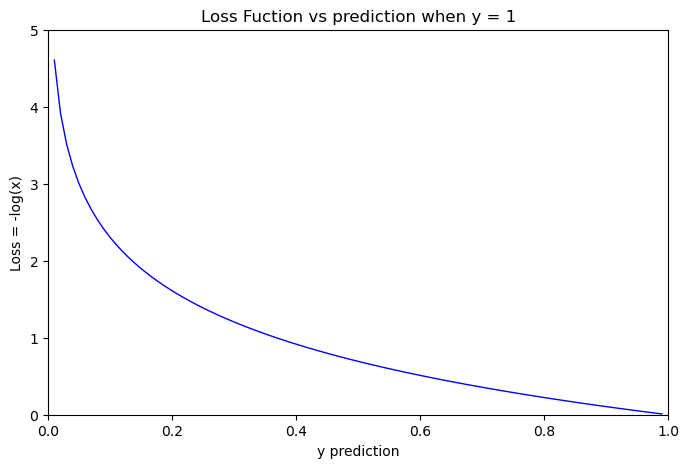

In [79]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(x2, y2, linewidth=1, c='b', label='-log(f(x))')
ax1.set_xlim(0,1)
ax1.set_ylim(0,5)
ax1.set_title('Loss Fuction vs prediction when y = 1')
ax1.set_xlabel('y prediction')
ax1.set_ylabel('Loss = -log(x)')
plt.show()

For this chart,  using the formula:
$$$$
- when $y=1$, and the prediction hit 1, then the loss is near zero. 
- when $y=0$ or near 0 such as 0.1, then the loss is high.

Next we examine the formula when $y=0$, the formula is
$$-log(1-x)$$

In [80]:
x3 = np.linspace(0.01,1,1000)
y3 = -np.log(1-x3[:-1])

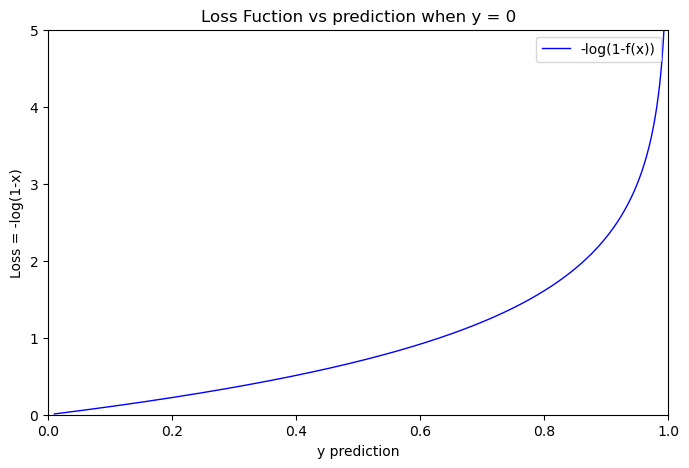

In [81]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(x3[:-1], y3, linewidth=1, c='b', label='-log(1-f(x))')
ax1.set_xlim(0,1)
ax1.set_ylim(0,5)
ax1.set_title('Loss Fuction vs prediction when y = 0')
ax1.set_xlabel('y prediction')
ax1.set_ylabel('Loss = -log(1-x)')
ax1.legend()
plt.show()

For this chart,  using the formula:
$$$$
- when $y=0$, and the prediction hit 0, then the loss is near zero. 
- when $y=1$ or near 1, then the loss is high.

Thus using log function we can have a smooth convex loss function.

### Loss Function for Logistics Regression

$$z = f(x)$$

<font color='blue'>

When $y^{(i)} = 1$
$$L(f(x),\hat y) = -log(g(f(x)))$$
$$L(f(x),\hat y) = -log(g(z))$$
When $y^{(i)}=0$
$$L(f(x),\hat y) = -log(1-g(f(x)))$$
$$L(f(x),\hat y) = -log(1-g(z))$$

We can compress the formula above into one single line

$$z = f(x)$$
$$loss(f(x),y) = y^{(i)}(-log(g(z)))-(1-y^{(i)})(log(1-g(z)))$$
$$loss(f(x),y) = -y^{(i)}log(g(z))-(1-y^{(i)})log(1-g(z))$$

<font color='red'>
    
$$loss(f(x),y) = -y^{(i)}log(g(z))-(1-y^{(i)})log(1-g(z))$$

<font color='blue'>
    
The loss function was derived using statistical techniques of **maximum likelihood**.
**Please note that the loss function above is also known as Binary-Cross-Entropy-Loss**

</font>

<font color='blue'>

**Binary-Cross-Entropy Loss:**
$$-\left[y^{(i)}log(g(z))+(1-y^{(i)})log(1-g(z))\right]$$

If <font color='blue'>$y=1$</font>, using the formula
$$loss(f(x),y) = -y^{(i)}log(g(z))-(1-y^{(i)})log(1-g(z))$$
after substituting $y=1$ to the formula, we have
$$loss(f(x),y) = (-1)log(g(z))-(1-1)log(1-g(z))$$
$$loss(f(x),y) = (-1)log(g(z))-(0)log(1-g(z))$$
$$loss(f(x),y)= (-1)log(g(z))-0$$
$$$$
<font color='blue'>
$$loss(f(x),y)= -log(g(z))$$

If <font color='blue'>$y=0$</font>, using the formula
$$loss(f(x),y) = -y^{(i)}log(g(z))-(1-y^{(i)})log(1-g(z))$$
after substituting $y=0$ to the formula, we have
$$loss(f(x),y) = (-0)log(g(z))-(1-0)log(1-g(z))$$
$$loss(f(x),y) = 0 -(1)log(1-g(z))$$
$$loss(f(x),y) = (-1)log(1-g(z))$$
$$$$
<font color='blue'>
$$loss(f(x),y)= - log(1-g(z))$$

### Cost Function for Logistics Regression

$$J(w,b) = \frac{1}{m} \sum_{m=1}^{m} {(LossFunction)}$$
$$$$
$$J(w,b) = \frac{1}{m} \sum_{m=1}^{m} \left[ -(y)log(g(z)) - (1-y)log(1-g(z))\right]$$
$$$$
<font color='red'>
$$J(w,b) = -\frac{1}{m} \sum_{m=1}^{m} \left[y^{(i)}log(g(z)) + (1-y^{(i)})log(1-g(z))\right]$$
$$J(w,b) = -\frac{1}{m} \sum_{m=1}^{m} \left[y^{(i)}log(g(f(x))) + (1-y^{(i)})log(1-g(f(x)))\right]$$
$$$$
- When we use the cost function above, we would have a smooth convex cost curve.

In [265]:
def compute_logistic_cost_beta(X,y,coefficient,intercept, reguLambda = 0):
    '''
    Logistics cost function for both single and multiple features
    X = matrix of training data, each training examples in rows (m) and features in column (n), 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    coefficient (w) = n by 1 vector, where n is total number of features
    intercept (b) = scalar

    Return:
    Cost (scalar)
    '''

    ### the following section convert 1d array to 2d array for ease of computation ###
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
        
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()
        
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)


    z = np.matmul(X,coefficient) + intercept
    sig = sigmoid_beta(z)
    cost = - (y * np.log(sig + 1e-20) + (1-y)*np.log(1-sig + 1e-20)).mean()
    
    return cost

<div class="alert alert-block alert-warning">

**Important**
    
To implement the logistics cost function, the type of arrays between x, y and w are very important. 

- the dimension of y and w is very important. Both must be of the same type
- if y is 1d array, then w must be 1d array, if one of them is different, there will be **no error but computation will be wrong**.
- this is due to the formula y * np.log(fx), what we want is element wise computation
- best is to use np.matmul to force a 2d operation.
- We also have risk of having `np.log(0)`. This will lead to a divide by zero error.
- To mitigate that problem, we add a very small number `1e-20` to the log number.

</div>

#### Showing Arrays Multiplication Issues

In [266]:
array1 = np.array([1,2,3])
array2 = np.array([2,2,2])

In [267]:
array1 * array2

array([2, 4, 6])

In [268]:
array3 = np.array([2,2,2]).reshape(-1,1)

In [269]:
array1

array([1, 2, 3])

In [270]:
array1.shape

(3,)

In [271]:
array3

array([[2],
       [2],
       [2]])

In [272]:
array3.shape

(3, 1)

In [273]:
(array1 * array3)

array([[2, 4, 6],
       [2, 4, 6],
       [2, 4, 6]])

**The computation above is wrong. We want a vector of [2, 4, 6].**

In [274]:
array1.reshape(-1,1) * array3

array([[2],
       [4],
       [6]])

#### Showing Log Issues

In [275]:
np.log([0.0001, 0.01, 0.1, 1,10,100,1000,1000000000,1e+308])

array([ -9.21034037,  -4.60517019,  -2.30258509,   0.        ,
         2.30258509,   4.60517019,   6.90775528,  20.72326584,
       709.19620864])

In [276]:
np.log([1e+309])

array([inf])

**There is no chances of reaching such a high number because we have applied Sigmoid function. Basically the log should be between 0 to 1 or 1-Sigmoid value.**

In [277]:
z1 =  np.arange(0,1,0.01)
z1

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [278]:
np.log(z1)

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3925/1677477055.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(z1)


array([       -inf, -4.60517019, -3.91202301, -3.5065579 , -3.21887582,
       -2.99573227, -2.81341072, -2.65926004, -2.52572864, -2.40794561,
       -2.30258509, -2.20727491, -2.12026354, -2.04022083, -1.96611286,
       -1.89711998, -1.83258146, -1.77195684, -1.71479843, -1.66073121,
       -1.60943791, -1.56064775, -1.51412773, -1.46967597, -1.42711636,
       -1.38629436, -1.34707365, -1.30933332, -1.27296568, -1.23787436,
       -1.2039728 , -1.17118298, -1.13943428, -1.10866262, -1.07880966,
       -1.04982212, -1.02165125, -0.99425227, -0.96758403, -0.94160854,
       -0.91629073, -0.89159812, -0.86750057, -0.84397007, -0.82098055,
       -0.7985077 , -0.77652879, -0.75502258, -0.73396918, -0.71334989,
       -0.69314718, -0.67334455, -0.65392647, -0.63487827, -0.61618614,
       -0.597837  , -0.5798185 , -0.56211892, -0.54472718, -0.52763274,
       -0.51082562, -0.49429632, -0.4780358 , -0.46203546, -0.4462871 ,
       -0.43078292, -0.41551544, -0.40047757, -0.38566248, -0.37

**We have issue with `log(0)`.**

In [279]:
np.log(0)

/var/folders/1h/s4bz3m4n32l_ljm5g40dytrw0000gp/T/ipykernel_3925/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [280]:
z2 = 1-z1
z2

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [281]:
np.log(z2)

array([ 0.        , -0.01005034, -0.02020271, -0.03045921, -0.04082199,
       -0.05129329, -0.0618754 , -0.07257069, -0.08338161, -0.09431068,
       -0.10536052, -0.11653382, -0.12783337, -0.13926207, -0.15082289,
       -0.16251893, -0.17435339, -0.18632958, -0.19845094, -0.21072103,
       -0.22314355, -0.23572233, -0.24846136, -0.26136476, -0.27443685,
       -0.28768207, -0.30110509, -0.31471074, -0.32850407, -0.34249031,
       -0.35667494, -0.37106368, -0.38566248, -0.40047757, -0.41551544,
       -0.43078292, -0.4462871 , -0.46203546, -0.4780358 , -0.49429632,
       -0.51082562, -0.52763274, -0.54472718, -0.56211892, -0.5798185 ,
       -0.597837  , -0.61618614, -0.63487827, -0.65392647, -0.67334455,
       -0.69314718, -0.71334989, -0.73396918, -0.75502258, -0.77652879,
       -0.7985077 , -0.82098055, -0.84397007, -0.86750057, -0.89159812,
       -0.91629073, -0.94160854, -0.96758403, -0.99425227, -1.02165125,
       -1.04982212, -1.07880966, -1.10866262, -1.13943428, -1.17

**To counter the issue of divide by zero issue, we add a very small number to the log.**

In [282]:
np.log(0+1e-20)

-46.051701859880914

In [283]:
z1[0] = z1[0]+1e-20
np.log(z1[0])

-46.051701859880914

We can also add the small value to the whole array

In [284]:
z1 = np.arange(0,1,0.01)
z1 = z1 + 1e-20

In [285]:
np.log(z1)

array([-4.60517019e+01, -4.60517019e+00, -3.91202301e+00, -3.50655790e+00,
       -3.21887582e+00, -2.99573227e+00, -2.81341072e+00, -2.65926004e+00,
       -2.52572864e+00, -2.40794561e+00, -2.30258509e+00, -2.20727491e+00,
       -2.12026354e+00, -2.04022083e+00, -1.96611286e+00, -1.89711998e+00,
       -1.83258146e+00, -1.77195684e+00, -1.71479843e+00, -1.66073121e+00,
       -1.60943791e+00, -1.56064775e+00, -1.51412773e+00, -1.46967597e+00,
       -1.42711636e+00, -1.38629436e+00, -1.34707365e+00, -1.30933332e+00,
       -1.27296568e+00, -1.23787436e+00, -1.20397280e+00, -1.17118298e+00,
       -1.13943428e+00, -1.10866262e+00, -1.07880966e+00, -1.04982212e+00,
       -1.02165125e+00, -9.94252273e-01, -9.67584026e-01, -9.41608540e-01,
       -9.16290732e-01, -8.91598119e-01, -8.67500568e-01, -8.43970070e-01,
       -8.20980552e-01, -7.98507696e-01, -7.76528789e-01, -7.55022584e-01,
       -7.33969175e-01, -7.13349888e-01, -6.93147181e-01, -6.73344553e-01,
       -6.53926467e-01, -

In [286]:
z2 = 1-z1
np.log(z2)

array([ 0.        , -0.01005034, -0.02020271, -0.03045921, -0.04082199,
       -0.05129329, -0.0618754 , -0.07257069, -0.08338161, -0.09431068,
       -0.10536052, -0.11653382, -0.12783337, -0.13926207, -0.15082289,
       -0.16251893, -0.17435339, -0.18632958, -0.19845094, -0.21072103,
       -0.22314355, -0.23572233, -0.24846136, -0.26136476, -0.27443685,
       -0.28768207, -0.30110509, -0.31471074, -0.32850407, -0.34249031,
       -0.35667494, -0.37106368, -0.38566248, -0.40047757, -0.41551544,
       -0.43078292, -0.4462871 , -0.46203546, -0.4780358 , -0.49429632,
       -0.51082562, -0.52763274, -0.54472718, -0.56211892, -0.5798185 ,
       -0.597837  , -0.61618614, -0.63487827, -0.65392647, -0.67334455,
       -0.69314718, -0.71334989, -0.73396918, -0.75502258, -0.77652879,
       -0.7985077 , -0.82098055, -0.84397007, -0.86750057, -0.89159812,
       -0.91629073, -0.94160854, -0.96758403, -0.99425227, -1.02165125,
       -1.04982212, -1.07880966, -1.10866262, -1.13943428, -1.17

**Please also note that we will never have a negative log number since we have applied Sigmoid function which converts all numbers from 0 to 1. If we encounter negative log issue, please check the input if it is between 0 to 1.**

### Implement Logistics Regression Cost Function

In [287]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])

In [288]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_logistic_cost_beta(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


<details>
<summary>
    <b>Expected Answer<b>
</summary>

        
0.3668667864055175


In [289]:
w_array1 = np.array([1,1]).reshape(-1,1)
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_logistic_cost_beta(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_logistic_cost_beta(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.503680863674846


<details>
<summary>
    <b>Expected Answer<b>
</summary>

Cost for b = -3 :  0.3668667864055175

Cost for b = -4 :  0.5036808636748461


In [290]:
m,n = X3_train.shape
initial_w = np.zeros(2)
initial_b = 0.
print(compute_logistic_cost_beta(X3_train, y3_train, initial_w, initial_b))

0.6931471805599453


<details>
<summary>
    <b>Expected Answer<b>
</summary>

        
<b>Cost at initial w (zeros)</b>
0.693

In [291]:
test_w = np.array([0.2, 0.2])
test_b = -24.
print(compute_logistic_cost_beta(X3_train, y3_train, test_w, test_b))

0.21833019382659782


<details>
<summary>
    <b>Expected Answer<b>
</summary>

        
<b>Cost at test w,b</b>
0.218

## Gradient Descent For Logistics Regression

Hypothesis: 
$$z = f_{w,b}(x^{(i)}) = f(x^{(i)})$$
$$g(z) = g(f(x^{(i)})) = \frac{1}{1+e^{-(f(x))}}$$


Cost Function: 
$$J(w,b) = -\frac{1}{m} \sum_{m=1}^{m} \left[y^{(i)}log(g(f(x))) + (1-y^{(i)})log(1-g(f(x)))\right]$$

Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives: $$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (g(f(x^{(i)})) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (g(f(x^{(i)})) - y^{(i)}) \\
\end{align}
$$

Full Implementation of Gradient Descent:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} (g(f(x^{(i)})) - y^{(i)})x^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} (g(f(x^{(i)})) - y^{(i)})  \newline \rbrace
\end{align*}$$

**Please note that the gradient descent algorithm is the same as linear regression. The differences is between $g(f(x))$ and $f(x)$  and the cost function.** 

Thus we will be adding a new function to compute the logistic gradient. Then we will be modifying existing gradient descent algorithm so that it can accept different gradient function and cost function. The default will be linear regression.

### Compute Logistics Gradient

In [292]:
def compute_logistic_gradient_beta(X,y, coefficient, intercept, reguLambda=0.):
    '''
    Compute gradient for each step size
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    w = n by 1 vector, where n is total number of features
    b = scalar (default = 0)
    reguLambda = scalar (default = 0), no regularization if default. Please enter appropriate lambda value for regularization.

    Return:
    db (scalar)
    dw (n by 1 vector)
    '''
    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)

    ### The following will check if the size match
    if X.shape[0] != y.shape[0]:
        print('Error, the size of X and y does not match!')
        return 
    
    if coefficient.shape[0] != X.shape[1]:
        print('Error, the size of X features does not match with size of w (coefficient)!')
        print(coefficient.shape)
        print(X.shape[1])
        return
    
    # total number of features and training examples
    m,n = X.shape

    # Initialization of Variables 
    db = 0
    dw = 0
    temp_db = 0
    temp_dw = 0

    # Compute Sigmoid 
    fx = ((X@coefficient) + intercept)
    sig = sigmoid_beta(fx)

    temp_dw = (sig - y) * X
    temp_db = (sig - y)
    
    db = temp_db.mean() 
    dw = temp_dw.mean(axis=0).reshape(-1,1) #.mean() function return a 1 d array

    # Compute Regularization Term
    #regu = coefficient * (reguLambda/m) 

    # This function do not support regularization
    dwRegu = dw

    return db, dwRegu

In [293]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_logistic_gradient_beta(X_tmp, y_tmp, w_tmp,  b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [[0.498333393278696], [0.49883942983996693]]


<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
```

In [294]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_logistic_gradient_beta(X3_train, y3_train, initial_w, initial_b,)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[[-12.009216589291151], [-11.262842205513596]]


<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
dj_db at initial w (zeros):
-0.1 
dj_dw at initial w (zeros):
[-12.00921658929115, -11.262842205513591]
```

In [295]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db,  dj_dw  = compute_logistic_gradient_beta(X3_train, y3_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())


dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [[-44.831353617873795], [-44.37384124953977]]


<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
dj_db at initial w (zeros):
-0.5999999999991071

dj_dw at initial w (zeros):
[-44.8313536178737957, -44.37384124953978]
```

### Modified Gradient Descent to Accept Linear and Logistics Regression

#### Addition Function for Linear Regression (Hide)

In [296]:
# Cost Function
def cost_function(X,y,coefficient,intercept,reguLambda=0):
    '''
    Actual cost function for both single and multiple features
    X = matrix of training data, each training examples in rows (m) and features in column (n), 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    coefficient (w) = n by 1 vector, where n is total number of features
    intercept (b) = scalar
    reguLambda = default is 0, no regularization, please enter appropriate lambda value for regularization

    Return:
    Cost (scalar)
    '''

    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)
    
    m = X.shape[0]

    # Compute Normal Cost Function
    fx = (X@coefficient) + intercept
    lossFunction = (fx - y) ** 2
    RSS = lossFunction.sum()
    cost = (1 / (2 * m)) * RSS

    # Compute Regularization Term
    # lambda/2m * sum(w^2)
    regu = (reguLambda/ (2*m)) * sum(coefficient ** 2)

    totalCost = cost + regu[0]
    
    return totalCost


# Compute Gradient
def compute_gradient(X, y, coefficient, intercept=0., reguLambda=0.):
    '''
    Compute gradient for each step size
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    w = n by 1 vector, where n is total number of features
    b = scalar (default = 0)
    reguLambda = scalar (default = 0), no regularization if default. Please enter appropriate lambda value for regularization.

    Return:
    db (scalar)
    dw (n by 1 vector)
    '''
    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(-1,1)
    
    if y.ndim == 1:
        y = y.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)
    
    # total number of features and training examples
    m,n = X.shape

    # Initialization of Variables 
    db = 0
    dw = 0
    temp_db = 0
    temp_dw = 0

    # Matrix computation
    fx = ((X@coefficient) + intercept)
    temp_dw = (fx - y) * X
    temp_db = (fx - y)
    
    db = temp_db.mean() 
    dw = temp_dw.mean(axis=0).reshape((n,1)) 

    # Compute Regularization Term
    regu = coefficient * (reguLambda/m) 

    dwRegu = dw + regu

    return db, dwRegu

#### Modified Gradient Descent

In [297]:
# Run Gradient Descent  
def compute_gradient_descent_beta(X, y, gradient_function = compute_gradient, cost_function = cost_function, init_coefficient = None, 
                                  init_intercept=0., iterations=10000, alpha=0.01, reguLambda = 0., printProgress=False, 
                                  printProgressRate = 1000, storeHistory=False):
    '''
    Runs Gradient Descent

    Compulsory Input
    X = matrix of training data, each training examples in rows and features in column, 
        Single feature data must be in m by 1 vector, where m is total number of training examples.
    y = m by 1 vector, where m is total number of training examples.
    
    Optional Input with Defauls
    gradient_function = enter the function name to compute Logistic gradient (default is compute_gradient which is for Linear Regression)
    cost_function = enter the function name to compute Logistic cost function (default is cost_function which is for Linear Regression)
    init_coefficient = initial w value (type: n by 1 vector, where n is total number of features) (default:None)
    init_intercept = initial b value (type: scalar) (default:0.)
    iterations = total number of runs for the gradient descent (default: 10,000)
    alpha = learning rate / step size (default:0.01)
    reguLambda = enter the lambda of regularization (default: reguLambda = 0 which is no regularization)

    Print Progress Options
    printProgress = To print the details while running gradient descent (type:Boolean) (default: False)
    printProgressRate = To print the details every n iterations (default:1000)
    storeHistory = To record all coefficient and intercept history (default:False) [Please note that if turn on, this may slow down the process] 

    Return:
    w = best w (n by 1 vector, where n is total number of features)
    b = best b (scalar)
    cost_history = Computed cost for each iterations (list)
    w_history = Computed w for each iterations (list)
    b_history = Computed g for each iterations (list)
    '''

    #### The following check for different data types and convert them to Numpy
    #### Also convert Pandas Series and DataFrame to Numpy
    #### Also convert 1D array to Numpy
    
    ### the following check if data type is Series
    if isinstance(X, pd.Series):
        #print('convert to numpy')
        X = X.to_frame()
    if isinstance(y, pd.Series):
        y = y.to_frame()
    
    ### the following check if data type is dataframe
    if isinstance(X, pd.DataFrame):
        #print('convert to numpy')
        X = X.to_numpy()
    if isinstance(y, pd.DataFrame):
        y = y.to_numpy()

    
    ### the following section convert 1d array to 2d array for ease of computation ###
    if X.ndim == 1:
        X = X.reshape(len(X),1)
    if y.ndim == 1:
        y = y.reshape(len(y),1)


    ### Check for init_coefficient separately as the dimension of w depends on X
    ### Also perform copy to avoid changing the original array

    if init_coefficient is None:
        init_coefficient = np.zeros([X.shape[1],1])

    if isinstance(init_coefficient, pd.Series):
        init_coefficient = init_coefficient.copy().to_frame()

    if isinstance(init_coefficient, pd.DataFrame):
        init_coefficient = init_coefficient.copy().to_numpy()

    if init_coefficient.ndim == 1:
        init_coefficient = init_coefficient.copy()
        init_coefficient = init_coefficient.reshape(len(init_coefficient),1)

    
    ### The following will check if the size match
    if X.shape[0] != y.shape[0]:
        print('Error, the size of X and y does not match!')
        return 
    
    if init_coefficient.shape[0] != X.shape[1]:
        print('Error, the size of X features does not match with size of w (coefficient)!')
        print(init_coefficient.shape)
        print(X.shape[1])
        return

    # Initialization of variables
    m,n = X.shape
    
    db = 0
    dw = 0

    b = init_intercept
    w = init_coefficient
    
    cost_history = []
    w_history = np.zeros((1,n))
    b_history = []

    
    for j in range(iterations):

        # Compute Partial Derivatives
        db, dw = gradient_function(X,y,w,b,reguLambda)

        b = b - (alpha * db)
        w = w - (alpha * dw)
        
        cost = cost_function(X,y,w,b,reguLambda)

        # Reshape w for printing and storing history
        w_convert = w.copy()
        w_convert = np.transpose(w_convert)
        
        if storeHistory == True: 
            cost_history.append(cost)
            b_history.append(b)
            w_history = np.vstack((w_history,w_convert))

        if printProgress == True:
            if j % printProgressRate == 0:
                print(f"iteration {j}: cost = {cost:.4e}: intercept = {b:.4e}: weights = {w_convert}")


    print(f"iteration {j}: Last cost = {cost:.4e}: intercept = {b:.4e}: weights = {w_convert}")    
    print('best w', np.round(w.flatten(),4))
    print('best b', np.round(b,4)) 

    return w, b, cost_history, w_history[1:], b_history

#### Testing Logistic Regression Gradient Descent

In [298]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [299]:
w_out, b_out, _, _, _ = compute_gradient_descent_beta(X_train, y_train, iterations=10000, alpha=0.1, gradient_function=compute_logistic_gradient_beta, 
                                                      cost_function=compute_logistic_cost_beta,printProgress=True) 

iteration 0: cost = 6.8461e-01: intercept = 0.0000e+00: weights = [[0.025      0.01666667]]
iteration 1000: cost = 1.5910e-01: intercept = -5.9110e+00: weights = [[2.30572624 2.07740353]]
iteration 2000: cost = 8.4601e-02: intercept = -8.3115e+00: weights = [[3.15508984 2.94023038]]
iteration 3000: cost = 5.7053e-02: intercept = -9.7823e+00: weights = [[3.68092411 3.47097047]]
iteration 4000: cost = 4.2908e-02: intercept = -1.0839e+01: weights = [[4.06024975 3.8527842 ]]
iteration 5000: cost = 3.4338e-02: intercept = -1.1662e+01: weights = [[4.35647898 4.15050189]]
iteration 6000: cost = 2.8604e-02: intercept = -1.2335e+01: weights = [[4.59929949 4.39430614]]
iteration 7000: cost = 2.4502e-02: intercept = -1.2905e+01: weights = [[4.80494417 4.6006459 ]]
iteration 8000: cost = 2.1424e-02: intercept = -1.3398e+01: weights = [[4.98324047 4.77945746]]
iteration 9000: cost = 1.9030e-02: intercept = -1.3834e+01: weights = [[5.14058319 4.93719618]]
iteration 9999: Last cost = 1.7118e-02: inte

<details>
<summary>
    <b>Expected Answer<b>
</summary>

``` 
- iterations = 10000
- alpha=0.1

updated parameters: 

w:[5.28 5.08], b:-14.222409982019837
```

In [300]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8
iterations = 10000
alpha = 0.001

coef, intercept, _, _, _ = compute_gradient_descent_beta(X3_train, y3_train, gradient_function=compute_logistic_gradient_beta, 
                                                         cost_function = compute_logistic_cost_beta, init_intercept=initial_b, 
                                                         init_coefficient=intial_w, iterations=iterations, alpha=alpha, printProgress=True) 

iteration 0: cost = 9.6379e-01: intercept = -7.9994e+00: weights = [[0.04397755 0.04655245]]
iteration 1000: cost = 3.0509e-01: intercept = -8.0184e+00: weights = [[0.06992517 0.0634808 ]]
iteration 2000: cost = 3.0472e-01: intercept = -8.0375e+00: weights = [[0.07007465 0.06363254]]
iteration 3000: cost = 3.0436e-01: intercept = -8.0566e+00: weights = [[0.07022366 0.06378378]]
iteration 4000: cost = 3.0400e-01: intercept = -8.0757e+00: weights = [[0.07037219 0.06393454]]
iteration 5000: cost = 3.0363e-01: intercept = -8.0947e+00: weights = [[0.07052026 0.06408482]]
iteration 6000: cost = 3.0328e-01: intercept = -8.1136e+00: weights = [[0.07066786 0.06423461]]
iteration 7000: cost = 3.0292e-01: intercept = -8.1324e+00: weights = [[0.07081501 0.06438392]]
iteration 8000: cost = 3.0257e-01: intercept = -8.1512e+00: weights = [[0.07096169 0.06453276]]
iteration 9000: cost = 3.0222e-01: intercept = -8.1700e+00: weights = [[0.07110792 0.06468113]]
iteration 9999: Last cost = 3.0187e-01: int

<details>
<summary>
    <b>Expected Output: Cost     0.30, (Click to see details):</b>
</summary>

    # With the following settings
    np.random.seed(1)
    intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
    initial_b = -8
    iterations = 10000
    alpha = 0.001
    #

```
Iteration    0: Cost     1.01   
Iteration 1000: Cost     0.31   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   
```

#### Prediction Logistics Function

In [301]:
def predict_logistic_beta(X, coefficient, intercept, prob=False):
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    if X.ndim == 1:
        X = X.reshape(-1,1)
        
    if np.isscalar(coefficient) == True:
        coefficient = np.array([coefficient])
        
    if coefficient.ndim == 1:
        coefficient = coefficient.reshape(-1,1)
    
    z = np.matmul(X,coefficient) + intercept
    #print(z)
    
    proba = sigmoid_beta(z)
    #print(proba)
    
    y_predict = proba>=0.5
    y_predict = y_predict.astype(int)
    if prob == False:
        return y_predict
    elif prob == True:
        return proba

In [302]:
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5
tmp_p = predict_logistic_beta(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p.flatten()}')

Output of predict: shape (4, 1), value [0 1 1 1]


<details>
<summary>
    <b>Expected Answer<b>
</summary>
        
```
Output of predict: shape (4,):
value [0. 1. 1. 1.]
```

In [303]:
tmp_proba = predict_logistic_beta(tmp_X, tmp_w, tmp_b, prob=True)
tmp_proba

array([[0.39943199],
       [0.93133679],
       [0.95662614],
       [0.61407858]])

## SciKit Learn Logistics Regression

In SciKit Learn, we can use `LogisticRegession()` function, the following is the features:

- This function allows binary and multi-class classification.
- This function implements regularization by default(L2/Ridge). However, it allows for L1,L2 and ElasticNet for Regularization. We can also set regularization to None.
- We need to fine tune the regularization parameter ourselves for optimal results.


Please also be aware that for `LogisticsRegression` in SciKit Learn, it supports different solvers for Logistic Regression. Solvers are different type of algorithm that find the best coefficient. Gradient Descent is one of the solvers but it is not the only one. SciKit Learn Logistic Regression do not support gradient descent. The followings are the solvers supported by SciKit Learn:

- **liblinear** (Using coordinate descent algorithm). Coordinate descent is different from gradient descent.
- **newton-cg** (Using Newton-Conjugate Gradient algorithm.)
- **newton-cholesky** (Using Newton-Cholesky optimization algorithm)
- **lbfgs** (Using Limited-memory Broyden-Fletcher-Goldfarb-Shanno algorithm) **Default solver**
- **sag** (Using Stochastic Average Gradient)
- **saga** (An extension of SAG that supports L1, L2, and Elastic Net regularization.)

Please note that each solver supports different type of regularization and each solver has been own limitation. Detail study of each solvers is beyond the scope of this tutorial.

### Reference


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Apply SciKit Learn Logistics Regression

### Simple Linear Binary Classification (One Feature)

In [304]:
x_train = np.array([1, 2.1, 11, 3.9, 8, 3, 9.6, 6.5, 7.2, 4.5, 5, 10]).reshape(-1,1)
y_train = np.array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [305]:
x_train_pos = x_train[y_train == 1]
y_train_pos = y_train[y_train == 1]
x_train_neg = x_train[y_train == 0]
y_train_neg = y_train[y_train == 0]

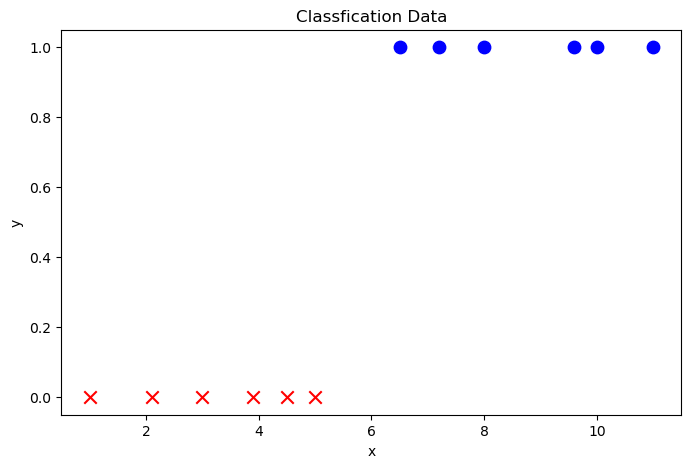

In [306]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(x_train_pos, y_train_pos, marker='o', s = 80, c='b')
ax1.scatter(x_train_neg, y_train_neg, marker='x', s = 80, c='r')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

#### Apply SciKit Learn Logistics Regression (Default Solver: lbfgs)

The default solver for `LogisticRegression` is `lbfgs`. By default it also uses L2 regularization. We will need to set it to `None`.

In [307]:
logisModel1 = LogisticRegression(penalty=None)
logis1 = logisModel1.fit(x_train, y_train)

In [308]:
print(logis1.intercept_)
print(logis1.coef_)

[-70.52707017]
[[12.27531093]]


In [309]:
y_hat1 = logis1.predict(x_train)
y_hat1

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [310]:
print('Train Accuracy: ', (np.mean(y_hat1 == y_train) * 100))

Train Accuracy:  100.0


In [311]:
logis1.score(x_train, y_train)

1.0

**The `score` function in `LogisticRegression` also compute the accuracy.** 1 means 100% accurate, a 50% accuracy will be 0.5.

In [312]:
logis1.score?

Signature: logis1.score(X, y, sample_weight=None)
Docstring:
Return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True labels for `X`.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights.

Returns
-------
score : float
    Mean accuracy of ``self.predict(X)`` w.r.t. `y`.
File:      /opt/anaconda3/envs/ML311/lib/python3.11/site-packages/sklearn/base.py
Type:      method

#### Using `liblinear` Solver

`liblinear` only supports L1 or L2 regularization. It do not have None option.

In [313]:
logisModel2 = LogisticRegression(penalty='l2', solver='liblinear') # Supports only l1 or l2. Cannot set to no regularization.
logis2 = logisModel2.fit(x_train, y_train)

In [314]:
print(logis2.intercept_)
print(logis2.coef_)

[-1.37992059]
[[0.32891568]]


In [315]:
y_hat2 = logis2.predict(x_train)
y_hat2

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [316]:
logis2.score(x_train, y_train)

0.8333333333333334

In [317]:
print('Train Accuracy: ', (np.mean(y_hat2 == y_train) * 100))

Train Accuracy:  83.33333333333334


Please note that this is with regularization. This solver do not support no regularization.

#### Using `newton-cg` Solver

In [318]:
logisModel3 = LogisticRegression(penalty=None, solver='newton-cg')
logis3 = logisModel3.fit(x_train, y_train)

In [319]:
print(logis3.intercept_)
print(logis3.coef_)

[-65.43839169]
[[11.39889366]]


In [320]:
y_hat3 = logis3.predict(x_train)
y_hat3

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [321]:
print('Train Accuracy: ', (np.mean(y_hat3 == y_train) * 100))

Train Accuracy:  100.0


#### Using `newton-cholesky` Solver

In [322]:
logisModel3a = LogisticRegression(penalty=None, solver='newton-cholesky')
logis3a = logisModel3a.fit(x_train, y_train)

In [323]:
print(logis3a.intercept_)
print(logis3a.coef_)

[-63.81997606]
[[11.09903688]]


In [324]:
y_hat3a = logis3a.predict(x_train)
y_hat3a

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [325]:
print('Train Accuracy: ', (np.mean(y_hat3a == y_train) * 100))

Train Accuracy:  100.0


#### Using `sag` Solver

When using `sag` solver, please include `max_iter=10000`. Without `max_iter` it will not converge well with a warning.

In [326]:
logisModel4 = LogisticRegression(penalty=None, solver='sag', max_iter=10000)
logis4 = logisModel4.fit(x_train, y_train)

In [327]:
print(logis4.intercept_)
print(logis4.coef_)

[-15.01624863]
[[2.62879147]]


In [328]:
y_hat4 = logis4.predict(x_train)
y_hat4

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [329]:
print('Train Accuracy: ', (np.mean(y_hat4 == y_train) * 100))

Train Accuracy:  100.0


#### Using `saga` Solver

When using `saga` solver, please include `max_iter=10000`. Without `max_iter` it will not converge well with a warning.

In [330]:
logisModel5 = LogisticRegression(penalty=None, solver='saga', max_iter=10000)
logis5 = logisModel5.fit(x_train, y_train)

In [331]:
print(logis5.intercept_)
print(logis5.coef_)

[-12.16614582]
[[2.13413575]]


In [332]:
y_hat5 = logis5.predict(x_train)
y_hat5

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [333]:
print('Train Accuracy: ', (np.mean(y_hat5 == y_train) * 100))

Train Accuracy:  100.0


#### Apply Gradient Descent

In [334]:
coef6, intercept6, _, _, _ = compute_gradient_descent_beta(x_train, y_train, gradient_function=compute_logistic_gradient_beta, 
                                                       cost_function = compute_logistic_cost_beta, printProgress=True) 

iteration 0: cost = 6.7553e-01: intercept = 0.0000e+00: weights = [[0.01366667]]
iteration 1000: cost = 3.9426e-01: intercept = -1.4246e+00: weights = [[0.33706877]]
iteration 2000: cost = 2.9878e-01: intercept = -2.3858e+00: weights = [[0.48414204]]
iteration 3000: cost = 2.4656e-01: intercept = -3.0977e+00: weights = [[0.59638069]]
iteration 4000: cost = 2.1341e-01: intercept = -3.6653e+00: weights = [[0.68759961]]
iteration 5000: cost = 1.9022e-01: intercept = -4.1401e+00: weights = [[0.76493675]]
iteration 6000: cost = 1.7289e-01: intercept = -4.5505e+00: weights = [[0.8324352]]
iteration 7000: cost = 1.5934e-01: intercept = -4.9135e+00: weights = [[0.89258384]]
iteration 8000: cost = 1.4837e-01: intercept = -5.2401e+00: weights = [[0.94701924]]
iteration 9000: cost = 1.3926e-01: intercept = -5.5378e+00: weights = [[0.99687468]]
iteration 9999: Last cost = 1.3153e-01: intercept = -5.8117e+00: weights = [[1.04292347]]
best w [1.0429]
best b -5.8117


In [335]:
y_hat6 = predict_logistic_beta(x_train, coef6, intercept6)
y_hat6.flatten()

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [336]:
print('Train Accuracy: ', (np.mean(y_hat6 == y_train) * 100))

Train Accuracy:  50.0


**Please note that the prediction looks very low. For troubleshooting, always check the data.**

In [337]:
y_hat6

array([[0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

In [338]:
y_train

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1])

**Using eyeball check, our prediction is 100%. Let us check the dimension of the data.**

In [339]:
y_hat6.shape

(12, 1)

In [340]:
y_train.shape

(12,)

**Again, we have the problem of working on 1D array with 2D array. In this case, let us reshape y_train to 2D array.**

In [341]:
print('Train Accuracy: ', (np.mean(y_hat6 == y_train.reshape(-1,1)) * 100))

Train Accuracy:  100.0


### Simple Linear Binary Classification (Two Features)

In [342]:
X2_train

array([[1. , 3. ],
       [2. , 4. ],
       [8. , 9. ],
       [3. , 4. ],
       [7. , 8.5],
       [6.8, 7.5],
       [2. , 5. ],
       [1.5, 2.5]])

In [343]:
y2_train

array([0, 0, 1, 0, 1, 1, 0, 0])

In [344]:
X2_pos = X2_train[y2_train == 1]
y2_pos = y2_train[y2_train == 1]
X2_neg = X2_train[y2_train == 0]
y2_neg = y2_train[y2_train == 0]

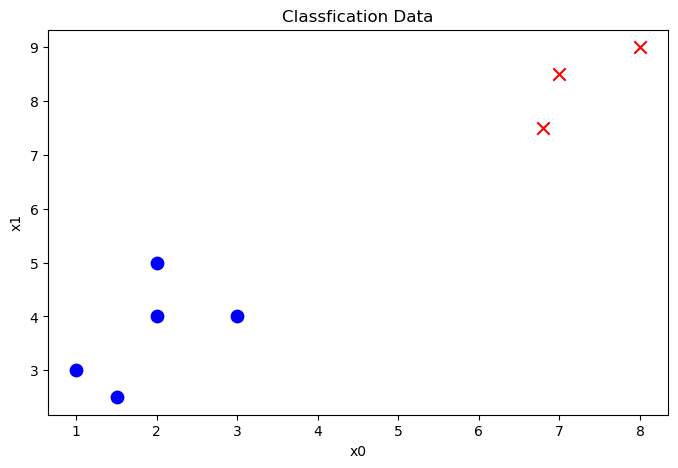

In [345]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X2_pos[:,0], X2_pos[:,1], marker='x', s = 80, c='r')
ax1.scatter(X2_neg[:,0], X2_neg[:,1], marker='o', s = 80, c='b')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

#### Apply SciKit Lean with Solver `sag`

In [346]:
logisModel7 = LogisticRegression(penalty=None, solver='sag', max_iter=10000)
logis7 = logisModel7.fit(X2_train, y2_train)

In [347]:
print('Intercept:',logis7.intercept_)
print('Coefficient:',logis7.coef_)

Intercept: [-6.14733278]
Coefficient: [[ 4.50251829 -2.54067136]]


In [348]:
y_hat7 = logis7.predict(X2_train)
y_hat7

array([0, 0, 1, 0, 1, 1, 0, 0])

In [349]:
print('Train Accuracy: %f'%(np.mean(y_hat7 == y2_train) * 100))

Train Accuracy: 100.000000


In [350]:
logis7.score(X2_train, y2_train)

1.0

As already mentioned earlier, the score function computes the accuracy of training data and actual data

**The following function `predict_proba` return the probability of the prediction. For binary classification, it return 2 columns. The first columns is (1 - prediction) and the second column is (prediction). Therefore, each rows add up to 1.**

In [351]:
logis7.predict_proba(X2_train)
# the return result show probabilities of [1 - prediction, prediction]

array([[9.99905501e-01, 9.44988334e-05],
       [9.99328270e-01, 6.71730335e-04],
       [9.04908562e-04, 9.99095091e-01],
       [9.42808793e-01, 5.71912069e-02],
       [2.24317943e-02, 9.77568206e-01],
       [4.43070320e-03, 9.95569297e-01],
       [9.99947026e-01, 5.29741784e-05],
       [9.96812208e-01, 3.18779245e-03]])

In [352]:
logis7.predict_proba(X2_train)[:,0] # extract probabilities of 1 - prediction

array([9.99905501e-01, 9.99328270e-01, 9.04908562e-04, 9.42808793e-01,
       2.24317943e-02, 4.43070320e-03, 9.99947026e-01, 9.96812208e-01])

In [353]:
logis7.predict_proba(X2_train)[:,1] # extract probabilities of prediction

array([9.44988334e-05, 6.71730335e-04, 9.99095091e-01, 5.71912069e-02,
       9.77568206e-01, 9.95569297e-01, 5.29741784e-05, 3.18779245e-03])

In [354]:
result6 = logis7.predict_proba(X2_train)[:,1] > 0.5
result6 

array([False, False,  True, False,  True,  True, False, False])

In [355]:
print('Train Accuracy: %f'%(np.mean(result6 == y2_train) * 100))

Train Accuracy: 100.000000


#### Apply Gradient Descent

In [356]:
coef8, intercept8, _, _, _ = compute_gradient_descent_beta(X2_train, y2_train, gradient_function=compute_logistic_gradient_beta, 
                                                       cost_function = compute_logistic_cost_beta, printProgress=True)

iteration 0: cost = 6.8587e-01: intercept = -1.2500e-03: weights = [[0.0076875 0.0040625]]
iteration 1000: cost = 1.9127e-01: intercept = -1.1842e+00: weights = [[ 1.41558979 -0.85091834]]
iteration 2000: cost = 1.2252e-01: intercept = -1.7566e+00: weights = [[ 1.9151958  -1.15677143]]
iteration 3000: cost = 9.3332e-02: intercept = -2.1586e+00: weights = [[ 2.22264626 -1.33906102]]
iteration 4000: cost = 7.6521e-02: intercept = -2.4755e+00: weights = [[ 2.44657863 -1.46863841]]
iteration 5000: cost = 6.5358e-02: intercept = -2.7399e+00: weights = [[ 2.62353509 -1.56906197]]
iteration 6000: cost = 5.7309e-02: intercept = -2.9682e+00: weights = [[ 2.77025425 -1.65100219]]
iteration 7000: cost = 5.1182e-02: intercept = -3.1698e+00: weights = [[ 2.89581728 -1.72018533]]
iteration 8000: cost = 4.6337e-02: intercept = -3.3508e+00: weights = [[ 3.00571322 -1.78003677]]
iteration 9000: cost = 4.2395e-02: intercept = -3.5152e+00: weights = [[ 3.10351942 -1.83276709]]
iteration 9999: Last cost =

In [357]:
y_hat8 = predict_logistic_beta(X2_train, coef8, intercept8)
y_hat8

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [358]:
print('Train Accuracy: ', (np.mean(y_hat8 == y2_train.reshape(-1,1)) * 100))

Train Accuracy:  100.0


#### Computing for Decision Boundary (Design Pattern for Computing Decision Boundary)

The following is the design pattern to plot decision boundary:

In [359]:
X2_train

array([[1. , 3. ],
       [2. , 4. ],
       [8. , 9. ],
       [3. , 4. ],
       [7. , 8.5],
       [6.8, 7.5],
       [2. , 5. ],
       [1.5, 2.5]])

In [360]:
x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1

In [361]:
print('x_min',x_min)
print('x_max',x_max)
print('y_min',y_min)
print('y_max',y_max)

x_min 0.0
x_max 9.0
y_min 1.5
y_max 10.0


In [362]:
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)

In [363]:
x1grid[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [364]:
x1grid[-10:]

array([8.9 , 8.91, 8.92, 8.93, 8.94, 8.95, 8.96, 8.97, 8.98, 8.99])

In [365]:
x2grid[:10]

array([1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59])

In [366]:
x2grid[-10:]

array([9.9 , 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99])

In [367]:
xx, yy = np.meshgrid(x1grid,x2grid)

In [368]:
x1grid.shape

(900,)

In [369]:
x2grid.shape

(850,)

In [370]:
xx

array([[0.  , 0.01, 0.02, ..., 8.97, 8.98, 8.99],
       [0.  , 0.01, 0.02, ..., 8.97, 8.98, 8.99],
       [0.  , 0.01, 0.02, ..., 8.97, 8.98, 8.99],
       ...,
       [0.  , 0.01, 0.02, ..., 8.97, 8.98, 8.99],
       [0.  , 0.01, 0.02, ..., 8.97, 8.98, 8.99],
       [0.  , 0.01, 0.02, ..., 8.97, 8.98, 8.99]])

In [371]:
xx.shape

(850, 900)

In [372]:
yy

array([[1.5 , 1.5 , 1.5 , ..., 1.5 , 1.5 , 1.5 ],
       [1.51, 1.51, 1.51, ..., 1.51, 1.51, 1.51],
       [1.52, 1.52, 1.52, ..., 1.52, 1.52, 1.52],
       ...,
       [9.97, 9.97, 9.97, ..., 9.97, 9.97, 9.97],
       [9.98, 9.98, 9.98, ..., 9.98, 9.98, 9.98],
       [9.99, 9.99, 9.99, ..., 9.99, 9.99, 9.99]])

In [373]:
yy.shape

(850, 900)

In [374]:
Z = logis7.predict(np.c_[xx.ravel(), yy.ravel()])

In [375]:
Z

array([0, 0, 0, ..., 1, 1, 1])

In [376]:
Z.shape

(765000,)

In [377]:
Z = Z.reshape(xx.shape)

In [378]:
Z

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

#### Plotting Decision Boundary

In [379]:
x_min, x_max = X2_train[:, 0].min() - 1, X2_train[:, 0].max() + 1
y_min, y_max = X2_train[:, 1].min() - 1, X2_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z = logis7.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

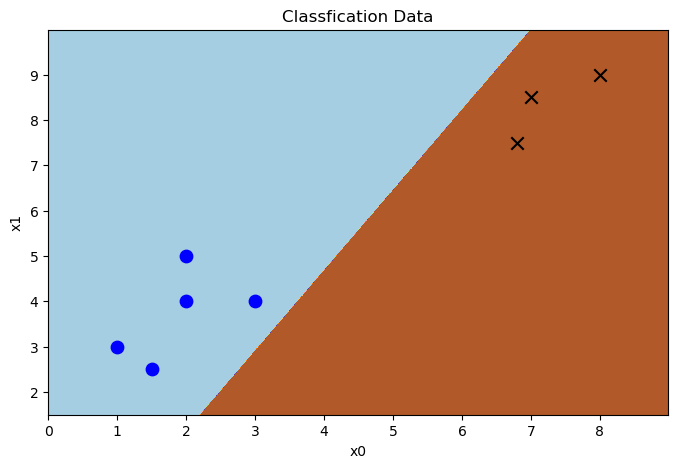

In [380]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax1.scatter(X2_pos[:,0], X2_pos[:,1], marker='x', s = 80, c='black')
ax1.scatter(X2_neg[:,0], X2_neg[:,1], marker='o', s = 80, c='b')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## Apply Logistics Regression for School Admission Data

In [381]:
X3_train[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [382]:
y3_train[:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [383]:
X3_train_admitted = X3_train[y3_train.flatten() == 1]
X3_train_NotAdmitted = X3_train[y3_train.flatten() == 0]

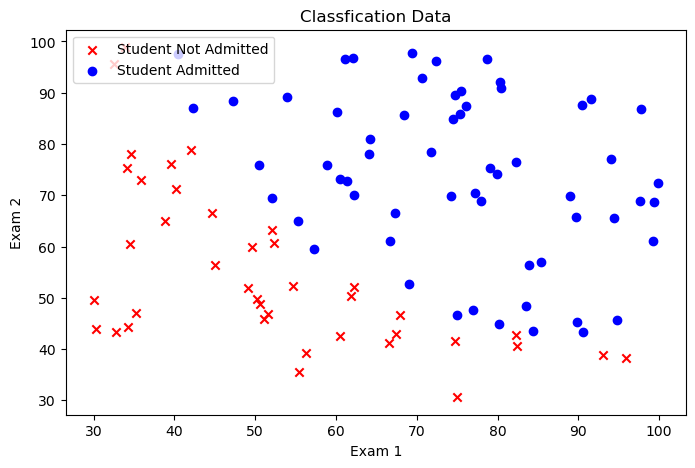

In [384]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.scatter(X3_train_NotAdmitted[:,0], X3_train_NotAdmitted[:,1], marker='x', c='r', label="Student Not Admitted")
ax1.scatter(X3_train_admitted[:,0], X3_train_admitted[:,1], marker='o', c='b', label="Student Admitted")
ax1.set_title('Classfication Data')
ax1.set_xlabel('Exam 1')
ax1.set_ylabel('Exam 2')
ax1.legend(loc="upper left")
plt.show()

### Using Gradient Descent Logistics Regression

In [385]:
X3_train[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [386]:
y3_train[:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [387]:
initial_b = -8
alpha = 0.001

In [388]:
coef9, intercept9, _, _, _ = compute_gradient_descent_beta(X3_train ,y3_train, gradient_function=compute_logistic_gradient_beta, 
                                                           cost_function=compute_logistic_cost_beta, init_intercept=initial_b, alpha = alpha, 
                                                           printProgress=True)

iteration 0: cost = 1.0071e+00: intercept = -7.9994e+00: weights = [[0.04480934 0.04435163]]
iteration 1000: cost = 3.0509e-01: intercept = -8.0183e+00: weights = [[0.0699251  0.06348073]]
iteration 2000: cost = 3.0472e-01: intercept = -8.0375e+00: weights = [[0.07007458 0.06363247]]
iteration 3000: cost = 3.0436e-01: intercept = -8.0566e+00: weights = [[0.07022359 0.06378372]]
iteration 4000: cost = 3.0400e-01: intercept = -8.0757e+00: weights = [[0.07037213 0.06393448]]
iteration 5000: cost = 3.0363e-01: intercept = -8.0946e+00: weights = [[0.07052019 0.06408475]]
iteration 6000: cost = 3.0328e-01: intercept = -8.1136e+00: weights = [[0.0706678  0.06423454]]
iteration 7000: cost = 3.0292e-01: intercept = -8.1324e+00: weights = [[0.07081494 0.06438386]]
iteration 8000: cost = 3.0257e-01: intercept = -8.1512e+00: weights = [[0.07096163 0.0645327 ]]
iteration 9000: cost = 3.0222e-01: intercept = -8.1700e+00: weights = [[0.07110786 0.06468106]]
iteration 9999: Last cost = 3.0187e-01: int

In [389]:
#Compute accuracy on our training set
y_hat9 = predict_logistic_beta(X3_train, coef9, intercept9)
print('Train Accuracy: %f'%(np.mean(y_hat9 == y3_train) * 100))

Train Accuracy: 92.000000


<details>
<summary>
    <b>Train Accuracy (approx):</b>
</summary>

92.00


### Using SciKit Learn Logistics Regression

#### Using `lbfgs` Solver

In [390]:
logisModel10 = LogisticRegression(penalty=None)
logis10 = logisModel10.fit(X3_train, y3_train.reshape(-1,))

In [391]:
print('Intercept:',logis10.intercept_)
print('Coefficient:',logis10.coef_)

Intercept: [-25.16138567]
Coefficient: [[0.20623222 0.20147191]]


In [392]:
y_hat10 = logis10.predict(X3_train)

In [393]:
print('Train Accuracy: %f'%(np.mean(y_hat1 == np.array(y3_train)) * 100))

Train Accuracy: 50.000000


In [394]:
y_hat10.shape

(100,)

In [395]:
y3_train.shape

(100, 1)

**Again, we have the problem of working on 1D array with 2D array. In this case, since `y_hat` is the result from SciKit Learn, we will change y3_train to 1D array.**

In [396]:
print('Train Accuracy: %f'%(np.mean(y_hat10 == np.array(y3_train.flatten())) * 100))

Train Accuracy: 89.000000


In [397]:
logis10.score(X3_train, y3_train)

0.89

<details>
<summary>
    <b>Train Accuracy (approx):</b>
</summary>

92.00

#### Using `sag` Solver

In [398]:
logisModel11 = LogisticRegression(penalty=None, solver='sag', max_iter=20000)
logis11 = logisModel11.fit(X3_train, y3_train.reshape(-1,))

In [399]:
print('Intercept:',logis11.intercept_)
print('Coefficient:',logis11.coef_)

Intercept: [-5.04447741]
Coefficient: [[0.04703875 0.04002078]]


In [400]:
y_hat11 = logis11.predict(X3_train)

In [401]:
print('Train Accuracy: %f'%(np.mean(y_hat11 == np.array(y3_train.flatten())) * 100))

Train Accuracy: 91.000000


In [402]:
logis11.score(X3_train, y3_train)

0.91

<details>
<summary>
    <b>Train Accuracy (approx):</b>
</summary>

92.00

After some experiment, solver `sag` or `saga` have better accuracy.

### Plotting Decision Boundary

In [403]:
x_min, x_max = X3_train[:, 0].min() - 1, X3_train[:, 0].max() + 1
y_min, y_max = X3_train[:, 1].min() - 1, X3_train[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.1)
x2grid = np.arange(y_min, y_max, 0.1)
xx, yy = np.meshgrid(x1grid,x2grid)
Z = logis11.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

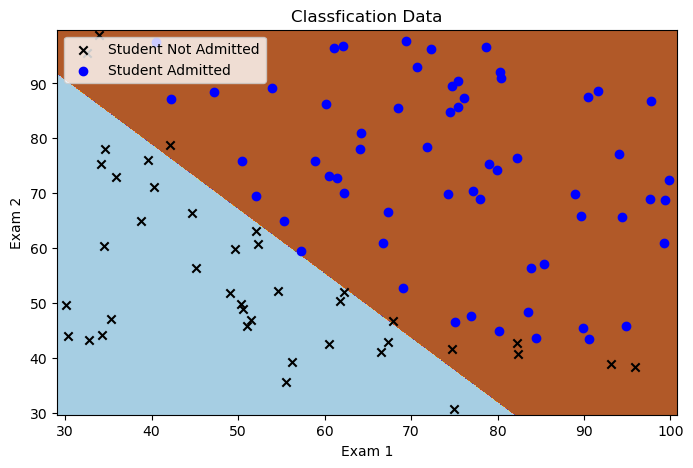

In [404]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax1.scatter(X3_train_NotAdmitted[:,0], X3_train_NotAdmitted[:,1], marker='x', c='black', label="Student Not Admitted")
ax1.scatter(X3_train_admitted[:,0], X3_train_admitted[:,1], marker='o', c='b', label="Student Admitted")
ax1.set_title('Classfication Data')
ax1.set_xlabel('Exam 1')
ax1.set_ylabel('Exam 2')
ax1.legend(loc="upper left")
plt.show()

## Apply Non_linear Logistics Regression with Pipeline

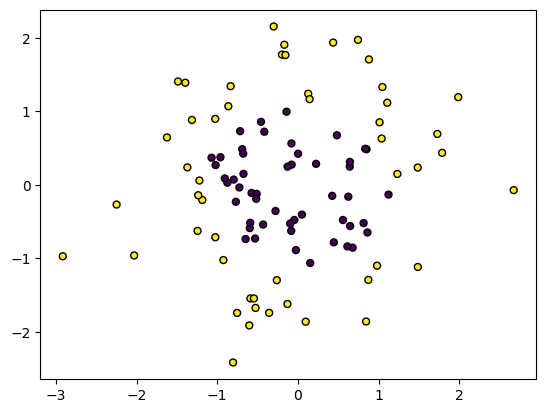

In [405]:
np.random.seed(3)
X, y = make_gaussian_quantiles(n_samples=100, n_features=2, n_classes=2)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor='k')
plt.show()

In [406]:
X.shape

(100, 2)

### Logistic Regression without Polynomial Features

In [407]:
degree = 1
stepsLinearLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe1 = Pipeline(stepsLinearLogisticsRegression)

losPipe1.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [408]:
losPipe1.score(X, y)

0.51

In [409]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z = losPipe1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

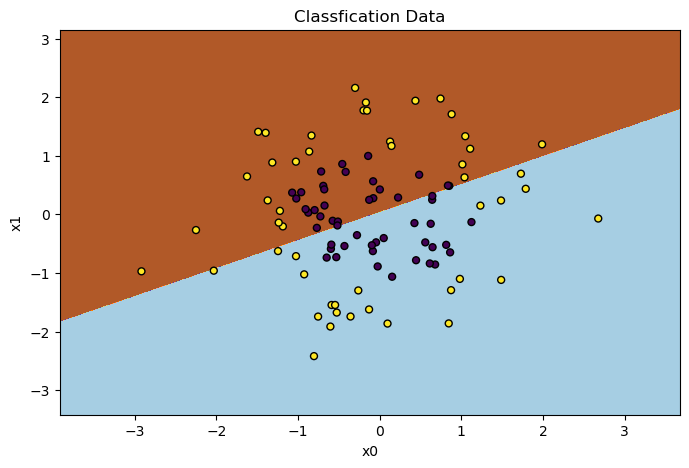

In [410]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Logistic Regression with Polynomial Features (MinMaxScaler)

In [411]:
degree = 25
stepsLogisticsRegression = [
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000))
]

losPipe2 = Pipeline(stepsLogisticsRegression)

losPipe2.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=25, include_bias=False)),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(max_iter=10000, penalty=None))])

In [412]:
losPipe2['model'].coef_

array([[-1.58851958e+02,  2.22144576e+02,  1.91792661e+03,
         5.05825246e+02,  1.68130678e+03, -4.35251223e+01,
         1.07909536e+02, -1.89064530e+02, -9.80495560e+01,
         6.64738193e+02,  1.40149668e+02,  1.07680985e+03,
         7.73955425e+01,  7.60337708e+02,  9.20833900e-01,
         3.04874693e+01, -2.51630938e+01, -9.35186263e+01,
        -8.11070593e+01, -7.80281901e+01,  3.07753141e+02,
         1.04199005e+02,  2.56157600e+02,  4.80195342e+00,
         5.28610625e+02,  7.05020393e+01,  3.64106104e+02,
         1.24907821e+01,  2.32287750e-01, -9.62880430e+00,
        -1.47378163e+01, -5.57488153e+01, -6.76135421e+01,
        -3.89306212e+01, -4.46168156e+01,  2.00705992e+02,
         9.62159857e+01,  1.23411669e+02,  5.43841830e+01,
         2.47899354e+02,  1.70341559e+01,  1.96762802e+02,
         7.51939428e+01,  2.06097440e+02,  1.66709657e+01,
        -6.71463612e+00, -5.79903841e+00, -7.75691790e+00,
        -1.44037256e+01, -7.10914893e+01, -2.21214124e+0

In [413]:
losPipe2.score(X, y)

1.0

In [414]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
Z2 = losPipe2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

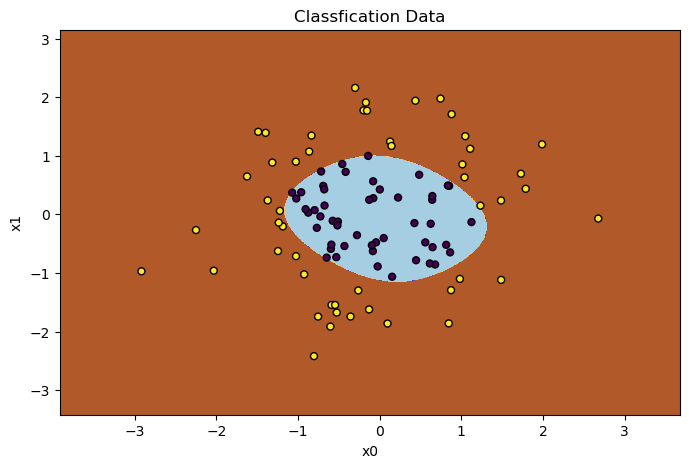

In [415]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z2, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Logistic Regression with Polynomial Features (StandardScaler)

In [416]:
degree = 25
polynomial_features3 = PolynomialFeatures(degree=degree, include_bias=False)
X_poly3 = polynomial_features3.fit_transform(X)
std_scaler3 = StandardScaler()
X_norm3 = std_scaler3.fit_transform(X_poly3)
model3 = LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000)
model3.fit(X_norm3, y)

LogisticRegression(max_iter=10000, penalty=None)

In [417]:
model3.coef_

array([[-2.96258765e+00,  1.07679253e+01,  6.79363170e+01,
         2.47815177e+01,  5.06729686e+01, -5.20089913e+00,
        -6.34463819e+00,  3.45805896e-01,  2.25089167e+00,
         1.73337176e+01,  5.65565084e+00,  2.22260579e+01,
        -9.71619500e-01,  1.99466881e+01, -1.50331394e+00,
         5.13200567e-01, -6.91305680e-01, -7.15410552e+00,
         6.28694336e-01, -2.17826199e+00,  1.19795901e+00,
         3.27836949e-01,  3.09674461e+00, -4.73453383e+00,
         7.93316431e+00, -1.98356082e+00,  3.97490678e+00,
        -7.72545531e-01,  9.52809666e-01,  8.22012680e-02,
        -2.11420231e+00,  1.02902575e+00, -4.10562328e+00,
        -2.91637664e-02, -2.37418557e+00, -1.91300589e+00,
        -5.93255842e-01, -5.58431341e-01, -1.40417052e+00,
         8.88933606e-01, -4.91491654e+00, -3.75169305e-01,
        -1.19660173e+00, -1.04761182e+00, -6.89644010e-01,
         7.72958104e-01,  3.14103781e-01, -2.14696202e-01,
         4.07899221e-01, -3.57316511e+00,  6.24400325e-0

In [418]:
model3.score(X_norm3, y)

1.0

In [419]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
xx, yy = np.meshgrid(x1grid,x2grid)
XX_poly = polynomial_features3.transform(np.c_[xx.ravel(), yy.ravel()])
XX_norm = std_scaler3.transform(XX_poly)
Z3 = model3.predict(XX_norm)
Z3 = Z3.reshape(xx.shape)

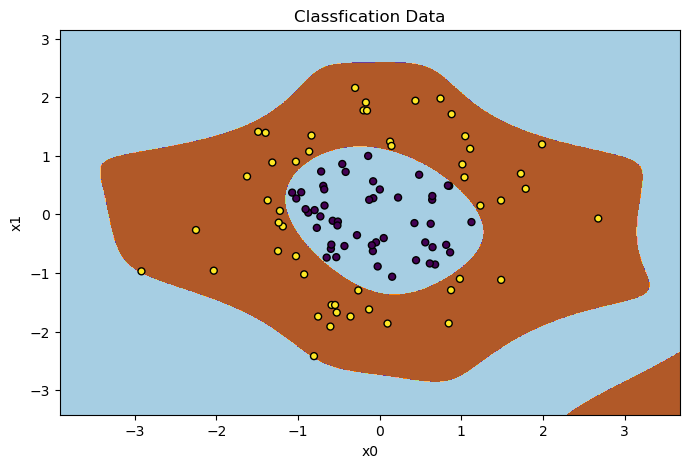

In [420]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

### Logistic Regression with Polynomial Features using Gradient Descent

In [421]:
degree = 25
polynomial_features4 = PolynomialFeatures(degree=degree, include_bias=False)
X_poly4 = polynomial_features4.fit_transform(X)

In [422]:
std_scaler4 = StandardScaler()
X_norm4 = std_scaler4.fit_transform(X_poly4)

In [423]:
startTime = datetime.now()
print(startTime)
coef12, intercept12, _, _, _ = compute_gradient_descent_beta(X_norm4 , y, gradient_function=compute_logistic_gradient_beta, 
                                                         cost_function=compute_logistic_cost_beta, iterations = 10000, alpha = 0.1)
endTime = datetime.now()
print(endTime)
print('Duration:',endTime - startTime)

2024-10-29 11:53:35.097499
iteration 9999: Last cost = 3.0147e-02: intercept = 4.0994e+00: weights = [[-2.66530036e-01  1.03484661e+00  8.38115277e+00  2.65137750e+00
   6.75920014e+00 -1.00622283e+00 -5.76163428e-01  9.17644320e-02
   5.00911124e-01  2.47962137e+00  5.65398533e-01  2.19045408e+00
  -3.28115269e-01  3.00160429e+00 -3.35844905e-01  5.45436025e-02
  -4.11046684e-02 -2.90662312e-01 -8.98723177e-02 -1.68439611e-01
   3.52633495e-01  4.59502735e-02  3.30599723e-01 -1.00475025e+00
   1.00855818e+00 -1.46488323e-01  7.47033853e-01 -1.35745840e-01
   8.94640454e-02  2.83523337e-02 -1.14068254e-01  1.61549111e-02
  -2.88287670e-01 -5.03797457e-02 -2.37865877e-01 -1.05686589e-01
  -5.99170279e-02 -6.04919599e-02 -2.66277109e-01  1.40314062e-01
  -7.66287202e-01  2.60118070e-02 -8.43707473e-02 -8.49519250e-03
  -8.50793910e-02  7.35404195e-02  4.04430349e-02 -9.31711426e-03
   3.55610624e-02 -2.96355315e-01  2.38940876e-02 -1.24524434e-01
  -1.16725423e-02 -1.77501926e-01 -1.7419

In [424]:
#Compute accuracy on our training set
y_hat12 = predict_logistic_beta(X_norm4, coef12, intercept12)
print('Train Accuracy: %f'%(np.mean(y_hat12 == y.reshape(-1,1)) * 100))

Train Accuracy: 100.000000


In [425]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1grid = np.arange(x_min, x_max, 0.01)
x2grid = np.arange(y_min, y_max, 0.01)
#print(x1grid.shape)
#print(x2grid.shape)
xx, yy = np.meshgrid(x1grid,x2grid)
#print(xx.shape)
#print(yy.shape)
XX_poly = polynomial_features4.transform(np.c_[xx.ravel(), yy.ravel()])
#print(XX_poly.shape)
XX_norm = std_scaler4.transform(XX_poly)
#print('norm',XX_norm.shape)
Z4 = predict_logistic_beta(XX_norm, coef12, intercept12)
#print(Z4.shape)
#print(Z4[:5])
#print(Z4[-10:])
Z4 = Z4.reshape(xx.shape)
#print(Z4.shape)

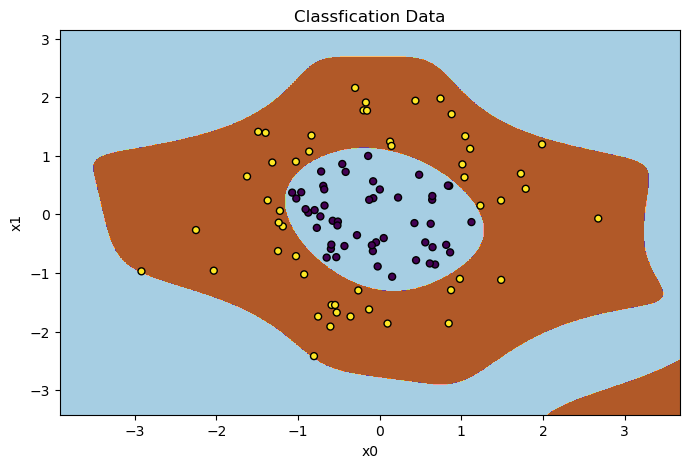

In [426]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 5))
ax1.contourf(xx, yy, Z4, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor='k')
ax1.set_title('Classfication Data')
ax1.set_xlabel('x0')
ax1.set_ylabel('x1')
plt.show()

## End